# 1. Mô tả

File này làm mục 2.2 ở đồ án

Để hiểu hơn về dữ liệu có thể xem mô tả dữ liệu ở file 01_data_collection.ipynb và tham khảo [Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

#  2. Thực hiện

**Chiến lược Phân tích Dữ liệu Khám phá (EDA Strategy):**

Mục tiêu: Hiểu rõ cấu trúc, chất lượng và các đặc điểm phân bố của dữ liệu trước khi tiến hành xử lý hay mô hình hóa.

1. Quan sát sơ bộ (Initial Observation)
Bước này giúp có cái nhìn tổng quan về kích thước và định dạng dữ liệu.

* **`df.shape`**: 
    * *Dùng để:* Kiểm tra kích thước của DataFrame.
    * *Cho biết:* Số lượng dòng (mẫu dữ liệu) và số lượng cột (đặc trưng). Giúp xác định quy mô dữ liệu.
* **`df.head()` / `df.tail()`**: 
    * *Dùng để:* Xem 5 dòng đầu và 5 dòng cuối của dữ liệu.
    * *Cho biết:* Định dạng thực tế của dữ liệu, cách các giá trị được lưu trữ, và nhận diện nhanh các bất thường ở đầu/cuối file.
* **`df.info()`**: 
    * *Dùng để:* Kiểm tra thông tin kỹ thuật của các cột.
    * *Cho biết:* Tên cột, kiểu dữ liệu (Dtype - float, int, object), và số lượng giá trị không rỗng (Non-Null Count). Giúp phát hiện sai lệch kiểu dữ liệu (ví dụ: số lưu dưới dạng chuỗi).
* **`df.describe(include='all')`**: 
    * *Dùng để:* Tóm tắt thống kê mô tả.
    * *Cho biết:* * Với biến định lượng (Numeric): Mean, Std, Min, Max, các phân vị (25%, 50%, 75%). -> Giúp sơ bộ thấy miền giá trị và khả năng có ngoại lệ (outliers).
        * Với biến định tính (Categorical): Số lượng giá trị duy nhất (unique), giá trị xuất hiện nhiều nhất (top), tần suất (freq).
* **Kiểm tra dữ liệu bẩn (Sanity Checks)**:
    * `df.duplicated().sum()`: Đếm số dòng trùng lặp hoàn toàn. Cần loại bỏ để tránh thiên lệch mô hình.
    * `df.isna().sum()`: Đếm số lượng giá trị bị thiếu (missing value) trên từng cột. Định hướng cách xử lý (điền hay xóa).

2. Quan sát chi tiết từng biến (Univariate Analysis)
Bước này đi sâu vào phân phối của từng đặc trưng riêng lẻ.

* **Biến định lượng (Numerical Columns):** (Ví dụ: `salary_in_usd`, `remote_ratio`, `work_year`)
    * *Phương pháp:* Vẽ Histogram và Boxplot.
    * *Mục tiêu:* Xem phân phối (chuẩn hay lệch), độ tập trung dữ liệu, và đặc biệt là phát hiện **Outliers** (giá trị ngoại lai - ví dụ: lương quá cao bất thường).
* **Biến định tính (Categorical Columns):** (Ví dụ: `experience_level`, `job_title`, `company_location`)
    * *Phương pháp:* Dùng `value_counts()` và vẽ Bar Chart.
    * *Mục tiêu:* Xem độ phổ biến của các nhóm, kiểm tra sự cân bằng của dữ liệu (imbalanced classes), và phát hiện lỗi nhập liệu (ví dụ: "Data Scientist" và "data scientist").

3. Quan sát mối quan hệ giữa các biến (Bivariate/Multivariate Analysis)
Bước này tìm kiếm các pattern (mẫu) tiềm ẩn và trả lời các câu hỏi nghiên cứu.

* **Quan hệ Biến định lượng - Định lượng:**
    * *Phương pháp:* Scatter Plot, Correlation Heatmap.
    * *Mục tiêu:* Xem sự tương quan (ví dụ: Năm làm việc `work_year` tăng thì Lương `salary_in_usd` có tăng không?).
* **Quan hệ Biến định tính - Định lượng:**
    * *Phương pháp:* Boxplot nhóm (Grouped Boxplot), Barplot (theo mean/median).
    * *Mục tiêu:* So sánh sự khác biệt (ví dụ: Mức lương trung bình giữa các `experience_level` khác nhau thế nào?).

4. Chiến lược tiếp theo (Next Steps - Data Cleaning & Preprocessing)
Dựa trên kết quả EDA, lập kế hoạch xử lý dữ liệu:
* Xử lý Missing values (nếu có).
* Xử lý Duplicates.
* Chuẩn hóa danh mục (gộp các job title tương tự).
* Xử lý Outliers (nếu cần thiết cho bài toán).
* Feature Engineering (tạo biến mới nếu cần).

In [14]:
# import các thư viện cần thiết 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


In [15]:
# Đọc dữ liệu
df = pd.read_csv('../data/original_data.csv')

## 2.1 Quan sát sơ bộ

In [16]:
# (Dòng, cột)
df.shape

(105434, 11)

In [17]:
# Xem thử 5 dòng đầu/cuối
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M


In [18]:
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
105429,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
105430,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
105431,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
105432,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
105433,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [19]:
# Thông tin tổng quan 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  object
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary              105434 non-null  int64 
 5   salary_currency     105434 non-null  object
 6   salary_in_usd       105434 non-null  int64 
 7   employee_residence  105434 non-null  object
 8   remote_ratio        105434 non-null  int64 
 9   company_location    105434 non-null  object
 10  company_size        105434 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [20]:
# Thống kê mô tả
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,105434.000000,105434,105434,105434,1.054340e+05,105434,105434.000000,105434,105434.000000,105434,105434
unique,NaN,4,4,347,NaN,26,NaN,98,NaN,92,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,61396,104865,14938,NaN,99906,NaN,94777,NaN,94834,102200
mean,2024.188981,NaN,NaN,NaN,1.626908e+05,NaN,158018.514179,NaN,21.103249,NaN,NaN
std,0.669665,NaN,NaN,NaN,2.137236e+05,NaN,74401.714026,NaN,40.714744,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2024.000000,NaN,NaN,NaN,1.064000e+05,NaN,106400.000000,NaN,0.000000,NaN,NaN
50%,2024.000000,NaN,NaN,NaN,1.471000e+05,NaN,147000.000000,NaN,0.000000,NaN,NaN
75%,2025.000000,NaN,NaN,NaN,1.997000e+05,NaN,199000.000000,NaN,0.000000,NaN,NaN


In [21]:
# Kiểm tra dòng trùng
num_duplicates = df.duplicated().sum()
print(f"Số lượng dòng bị trùng lặp hoàn toàn: {num_duplicates}")
print(f"Tỷ lệ trùng lặp: {(num_duplicates / df.shape[0]) * 100:.2f}%")

Số lượng dòng bị trùng lặp hoàn toàn: 52997
Tỷ lệ trùng lặp: 50.27%


In [22]:
# Kiểm tra dữ liệu bị thiếu (Missing Values)
print("Số lượng giá trị bị thiếu trên từng cột:")
print(df.isna().sum())

Số lượng giá trị bị thiếu trên từng cột:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


**Nhận xét từ Quan sát sơ bộ:**

Dựa trên kết quả chạy code phía trên, ta có các đánh giá ban đầu về dữ liệu:

1.  **Cấu trúc:** Dataset có **105,434 dòng** và **11 cột**.

Mỗi dòng là thông tin của một người làm trong lĩnh vực khoa học dữ liệu.

Các cột (dựa trên mô tả trên kaggle):
- **work_year**: Năm mà mức lương được trả.
- **experience_level**: Mức độ kinh nghiệm trong công việc trong năm đó.
- **employment_type**: Loại hình việc làm của vị trí này.
- **job_title**: Chức danh công việc trong năm.
- **salary**: Tổng số tiền lương (gross) được trả.
- **salary_currency**: Đơn vị tiền tệ của mức lương theo mã ISO 4217.
- **salaryinusd**: Mức lương quy đổi sang USD.
- **employee_residence**: Quốc gia cư trú chính của nhân viên trong năm làm việc (mã quốc gia ISO 3166).
- **remote_ratio**: Tỷ lệ phần trăm công việc được thực hiện từ xa.
- **company_location**: Quốc gia đặt trụ sở chính của công ty hoặc chi nhánh ký hợp đồng.

- **company_size**: Số lượng nhân sự trung bình làm việc cho công ty trong năm. 

    **Note**: cái này khá mâu thuẫn, dễ dẫn đến hiểu lầm kiểu dữ liệu ở đây là số, giá trị hiển thị ở cột này là L, M, S là kiểu string (object) chứ không phải số (int hay float). 


2.  **Chất lượng dữ liệu (Data Quality):**
    * **Missing Values:** Rất tốt. Không có bất kỳ giá trị nào bị thiếu (NaN) trong toàn bộ dataset (`0 missing values`).
    * **Duplicates:** Có vấn đề lớn. 
    
    Có tới **52,997 dòng trùng lặp**, chiếm quá nửa (khoảng **50.27%**) tổng dữ liệu. 
    
    Điều này cho thấy dữ liệu có thể được gộp từ nhiều nguồn chồng chéo hoặc lỗi ghi nhận (ví dụ có thể đã lấy dữ liệu từ nhiều người nhưng lấy trùng công ty và vị trí). 
    
    Cần phải xử lý xóa bỏ và hoàn toàn có thể xóa vì theo yêu cầu đồ án >= 1000 dòng, và thực tế thì dữ liệu dư thừa không có ích mà còn có hại (lỗi bias khi phân tích sâu và chạy học máy). 
3.  **Kiểu dữ liệu (Data Types):**
    * Các cột số (`work_year`, `salary`, `salary_in_usd`, `remote_ratio`) và các cột phân loại (`experience_level`, `job_title`, v.v.) đã được Pandas nhận diện đúng (`int64`, `object`).
4.  **Thống kê sơ bộ:**
    * `job_title`: Có tới 347 chức danh công việc khác nhau. Có vẻ sẽ khó để kiểm tra tính nhất quán. 
    * `salary_in_usd`: Dải lương rất rộng, từ $15k đến $800k, cho thấy có thể tồn tại các giá trị ngoại lai (outliers).
    * `work_year`: Dữ liệu tập trung chủ yếu vào năm 2024, 2025.
    * `salary_currency`, `employee_residence`, `company_location`: Các biến thể hiện vị trí địa lý, địa điểm có khá nhiều giá trị phân biệt --> từ đó cho thấy dữ liệu được thu thập khá rộng, đa dạng về mặt địa lý -->  **Gom nhóm theo địa lý so sự khác biệt về tỷ lệ
    lương (câu hỏi (1))? Mức lương so với lương trung bình của khu vực đó? --> nghề này giàu hay nghèo ở khu vực đó ?**

**Kết luận:** Dữ liệu sạch về mặt missing value nhưng bị trùng lặp nghiêm trọng.

Để hiểu sâu hơn, hãy cùng phân tích và quan sát từng cột.

Trước hết chúng ta cần loại bỏ các dòng trùng lặp trước.

In [23]:
# Kiểm tra số lượng dòng trước khi xóa
print(f"Số dòng ban đầu: {df.shape[0]}")

# Xóa các dòng trùng lặp (giữ lại 1 bản ghi đầu tiên)
df_clean = df.drop_duplicates()

# Kiểm tra lại số lượng dòng sau khi xóa
print(f"Số dòng sau khi làm sạch: {df_clean.shape[0]}")
print(f"Số dòng đã bị loại bỏ: {df.shape[0] - df_clean.shape[0]}")

# Gán lại df để dùng cho các bước sau
df = df_clean.copy()

Số dòng ban đầu: 105434
Số dòng sau khi làm sạch: 52437
Số dòng đã bị loại bỏ: 52997


## 2.2 Quan sát chi tiết (từng cột)

Ở phần này chúng ta sẽ quan sát chi tiết các thuộc tính (cột) có ngữ nghĩa mạnh cũng như cần thiết, quan trọng và có khả năng phân tích cao (ít giá trị phân biệt, tiềm năng cung cấp câu chuyện, ...).

### 2.2.1 `work_year`

Đây là biến định lượng rời rạc (hoặc có thể xem là biến thứ bậc thời gian). Việc phân tích biến này giúp ta hiểu dữ liệu được thu thập trong khoảng thời gian nào và xu hướng phát triển của số lượng công việc qua các năm.

**Phương pháp:**
* Vẽ histogram để xem sự phân bố.
* Vẽ biểu đồ cột (Bar Chart) để trực quan hóa xu hướng tăng/giảm.

In [24]:
# Tính toán các chỉ số thống kê cho work_year
print("--- Thống kê mô tả cho biến work_year ---")
print(f"Mean (Trung bình): {df['work_year'].mean():.2f}")
print(f"Median (Trung vị): {df['work_year'].median()}")
print(f"Mode (Xuất hiện nhiều nhất): {df['work_year'].mode()[0]}")
print(f"Min (Năm bắt đầu): {df['work_year'].min()}")
print(f"Max (Năm gần nhất): {df['work_year'].max()}")

# Liệt kê các giá trị unique
unique_years = sorted(df['work_year'].unique())
print("\n--- Các giá trị duy nhất (Unique Values) ---")
print(f"Danh sách các năm: {unique_years}")
print(f"Tổng số năm khảo sát: {len(unique_years)} năm")

--- Thống kê mô tả cho biến work_year ---
Mean (Trung bình): 2024.21
Median (Trung vị): 2024.0
Mode (Xuất hiện nhiều nhất): 2024
Min (Năm bắt đầu): 2020
Max (Năm gần nhất): 2025

--- Các giá trị duy nhất (Unique Values) ---
Danh sách các năm: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Tổng số năm khảo sát: 6 năm


Số lượng bản ghi theo năm:
work_year
2020       75
2021      214
2022     1113
2023     4537
2024    27686
2025    18812
Name: count, dtype: int64

Tỷ lệ phần trăm (%):
work_year
2020     0.14
2021     0.41
2022     2.12
2023     8.65
2024    52.80
2025    35.88
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\4276480465.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='work_year', palette='viridis', order=year_counts.index)


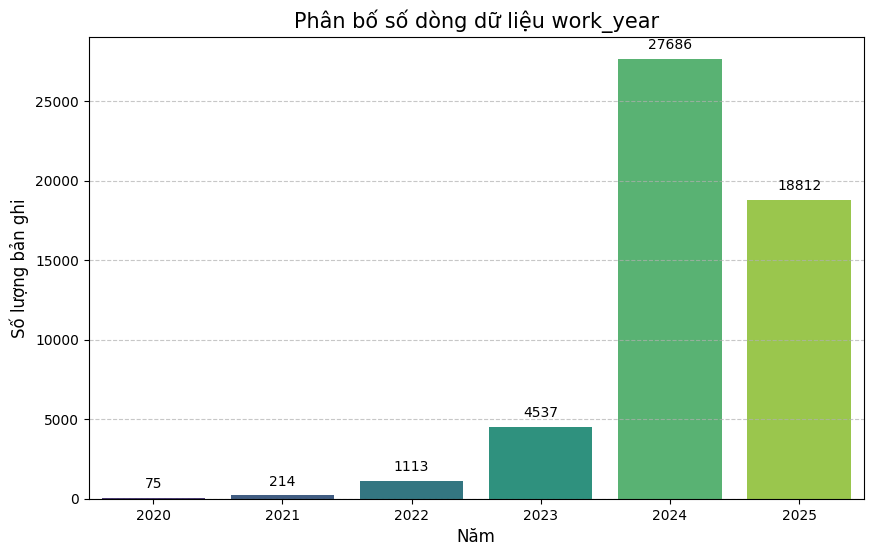

In [25]:
# Quan sát phân phối
year_counts = df['work_year'].value_counts().sort_index()
year_percent = df['work_year'].value_counts(normalize=True).sort_index() * 100

print("Số lượng bản ghi theo năm:")
print(year_counts)
print("\nTỷ lệ phần trăm (%):")
print(year_percent.round(2))

# 2. Trực quan hóa
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột
ax = sns.countplot(data=df, x='work_year', palette='viridis', order=year_counts.index)

# Thêm nhãn giá trị lên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Phân bố số dòng dữ liệu work_year', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng bản ghi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Nhận xét về `work_year`:**

1.  **Xu hướng thời gian:** Tác giả chủ yếu thu thập dữ liệu của các năm gần đây:
    * Năm xa nhất 2020 chỉ có 75 dòng dữ liệu và tăng theo từng năm.
    * Đến năm 2024, số lượng tăng vọt lên **27,686 bản ghi** (chiếm ~52.8%).
    * Năm 2025 (dù chưa hết năm hoặc là dữ liệu dự báo/mới nhất) cũng đã có **18,812 bản ghi** (chiếm ~35.9%).
2.  **Độ tập trung:**
    * Hơn **88%** dữ liệu tập trung ở hai năm gần nhất là **2024 và 2025**. 
    * Các năm 2020 - 2023 chiếm tỷ trọng rất nhỏ (< 12%).

=> Điều này khá hợp lý, dữ liệu biến động mạnh theo thời điểm như kiểu mức lương nên tập trung lấy số liệu mới mới có giá trị cao và phù hợp với việc dự đoán, mô tả. 

3.  **Insight:**
    * Dữ liệu này phản ánh cực kỳ sát thực trạng thị trường lao động **hiện tại và mới nhất**.
    * Tuy nhiên, khi phân tích xu hướng dài hạn (time-series trend), cần thận trọng vì lượng dữ liệu quá khứ (2020-2022) quá ít so với hiện tại, có thể gây nhiễu nếu so sánh trực tiếp về mặt số lượng tổng (sum) mà không dùng số trung bình (mean) hoặc tỷ lệ.

### 2.2.2 `experience_level` 

Biến này là biến định tính (categorical), cụ thể hơn là biến thứ bậc (ordinal) vì các cấp độ kinh nghiệm có thể xếp hạng từ thấp đến cao.

**Mục tiêu:**
* Xác định tỷ lệ nhân sự ở từng cấp bậc.
* Hiểu xem dữ liệu đang đại diện chủ yếu cho nhóm đối tượng nào (người mới hay chuyên gia).

**Phương pháp:**
* Sử dụng `value_counts()` để tính số lượng và tỷ lệ phần trăm của từng nhóm.
* Vẽ biểu đồ cột (Bar Chart) để trực quan hóa sự chênh lệch số lượng giữa các cấp bậc.
* **Lưu ý quan trọng:** Khi vẽ biểu đồ, cần sắp xếp trục hoành theo đúng lộ trình thăng tiến tự nhiên (**EN $\rightarrow$ MI $\rightarrow$ SE $\rightarrow$ EX**) thay vì sắp xếp theo số lượng giảm dần, để người xem dễ hình dung cấu trúc nhân sự.

--- Số lượng nhân sự theo cấp bậc ---
experience_level
SE    27729
MI    16956
EN     6060
EX     1692
Name: count, dtype: int64

--- Tỷ lệ phần trăm (%) ---
experience_level
SE    52.88
MI    32.34
EN    11.56
EX     3.23
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\1379138665.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='experience_level', order=order_levels, palette='magma')


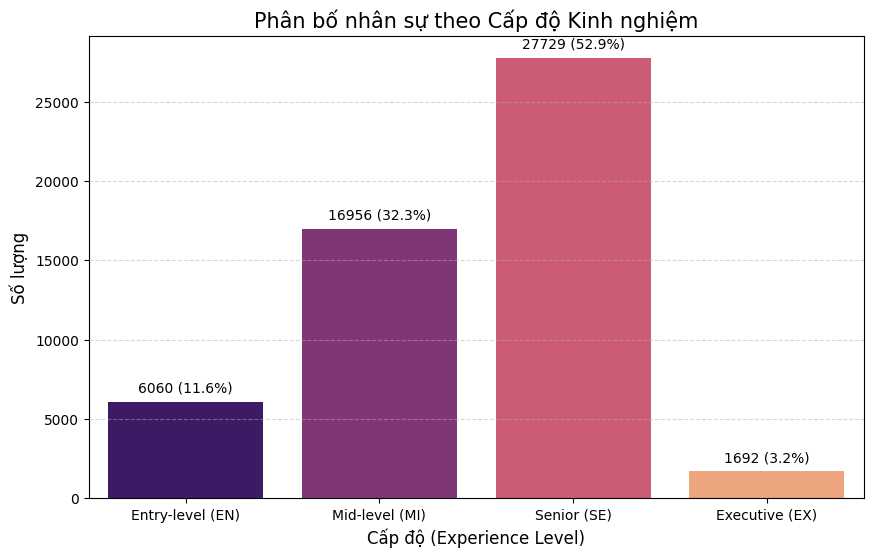

In [26]:
# 1. Thống kê số lượng và tỷ lệ %
exp_counts = df['experience_level'].value_counts()
exp_percent = df['experience_level'].value_counts(normalize=True) * 100

print("--- Số lượng nhân sự theo cấp bậc ---")
print(exp_counts)
print("\n--- Tỷ lệ phần trăm (%) ---")
print(exp_percent.round(2))

# 2. Thay thế tên viết tắt để biểu đồ dễ hiểu hơn (Optional - chỉ dùng khi vẽ)
exp_mapping = {
    'EN': 'Entry-level (EN)',
    'MI': 'Mid-level (MI)',
    'SE': 'Senior (SE)',
    'EX': 'Executive (EX)'
}

# 3. Trực quan hóa
plt.figure(figsize=(10, 6))
# Sắp xếp theo thứ tự thông thường: EN -> MI -> SE -> EX để dễ theo dõi tiến trình sự nghiệp
order_levels = ['EN', 'MI', 'SE', 'EX']

ax = sns.countplot(data=df, x='experience_level', order=order_levels, palette='magma')

# Thêm nhãn giá trị
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({p.get_height()/len(df)*100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Phân bố nhân sự theo Cấp độ Kinh nghiệm', fontsize=15)
plt.xlabel('Cấp độ (Experience Level)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
# Đổi nhãn trục x sang tên đầy đủ cho dễ đọc
plt.xticks(ticks=range(4), labels=[exp_mapping[l] for l in order_levels])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét về `experience_level`:**

1.  **Sự áp đảo của nhóm Senior (SE):**
    * Nhóm **Senior** chiếm tỷ trọng lớn nhất ( **52.9%**). Điều này cho thấy thị trường Data Science hiện tại (hoặc ít nhất là trong tập dữ liệu này) đang có nhu cầu rất cao hoặc nguồn cung dồi dào ở phân khúc nhân sự đã có kinh nghiệm.
2.  **Cấu trúc hình tháp ngược (hoặc quả trám):**
    * Thông thường, nhân sự Entry-level (EN) sẽ đông nhất, nhưng ở đây **EN** chỉ chiếm thiểu số (**11.6%**).
    * Nhóm **Mid-level (MI)** đứng thứ hai (**32.3%**).
    * Nhóm **Executive (EX)** chiếm tỷ lệ nhỏ nhất (**3.2%**), điều này hợp lý vì vị trí lãnh đạo luôn ít hơn nhân viên và khi lấy mẫu thì cũng khó tiếp cận những người cấp cao như này. 
3.  **Insight:**
    * Dữ liệu có thể bị thiên lệch về phía các vị trí cấp cao (Senior).
    * Các phân tích về lương sau này sẽ chịu ảnh hưởng lớn từ nhóm Senior (lương cao), nên mức lương trung bình của toàn bộ tập dữ liệu có thể sẽ cao hơn mức thực tế của một người mới vào nghề.

### 2.2.3 `employment_type`

Biến này cho biết chế độ hợp đồng lao động của nhân sự.

Các giá trị viết tắt và ý nghĩa:
* **FT (Full-time):** Làm việc toàn thời gian (biên chế chính thức).
* **PT (Part-time):** Làm việc bán thời gian.
* **CT (Contract):** Làm việc theo hợp đồng (thường là dự án ngắn hạn hoặc tư vấn).
* **FL (Freelance):** Làm việc tự do (nhận việc theo task/dự án).

**Mục tiêu:**
* Xem xét mức độ phổ biến của các hình thức làm việc trong ngành Data Science.

**Phương pháp:**
* Thống kê tỷ lệ phần trăm các nhóm.
* Sử dụng biểu đồ cột (Bar Chart) để trực quan hóa. Dưa vào quan sát sơ bộ dữ liệu sẽ rất lệch (imbalanced), ta cần chú ý các nhóm thiểu số có thể bị "chìm" trên biểu đồ.

--- Số lượng theo hình thức làm việc ---
employment_type
FT    51931
PT      247
CT      243
FL       16
Name: count, dtype: int64

--- Tỷ lệ phần trăm (%) ---
employment_type
FT    99.04
PT     0.47
CT     0.46
FL     0.03
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\2905930775.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='employment_type',


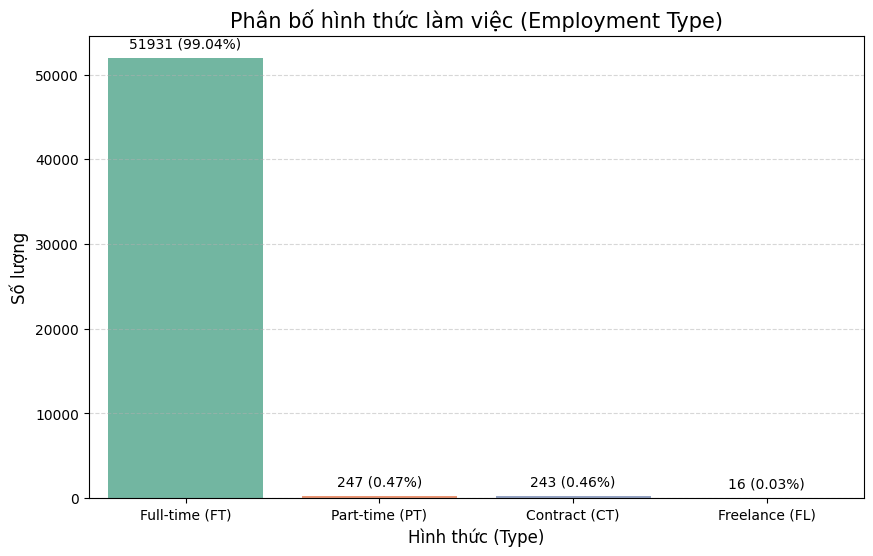

In [ ]:
# 1. Thống kê số lượng và tỷ lệ %
emp_counts = df['employment_type'].value_counts()
emp_percent = df['employment_type'].value_counts(normalize=True) * 100

print("--- Số lượng theo hình thức làm việc ---")
print(emp_counts)
print("\n--- Tỷ lệ phần trăm (%) ---")
print(emp_percent.round(2))

# 2. Mapping tên đầy đủ
emp_mapping = {
    'FT': 'Full-time (FT)',
    'PT': 'Part-time (PT)',
    'CT': 'Contract (CT)',
    'FL': 'Freelance (FL)'
}

# 3. Trực quan hóa
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='employment_type', 
                   order=emp_counts.index, 
                   palette='Set2')

# Thêm nhãn giá trị
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({p.get_height()/len(df)*100:.2f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Phân bố hình thức làm việc (Employment Type)', fontsize=15)
plt.xlabel('Hình thức (Type)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(ticks=range(4), labels=[emp_mapping[idx] for idx in emp_counts.index])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét về `employment_type`:**

1.  **Sự thống trị tuyệt đối của Full-time (FT):**
    * Hình thức **Full-time** chiếm tới hơn **99%** dữ liệu (cụ thể khoảng 99.04%).
    * Điều này cho thấy tính chất công việc trong ngành Khoa học dữ liệu đòi hỏi sự ổn định, gắn bó lâu dài và thường là các vị trí chính thức trong tổ chức. Khá hợp lý, vì những người làm về data thường nắm những dữ liệu của công ty và những kiểu dữ liệu như này thường chứa thông tin mật và nhạy cảm.
2.  **Các hình thức khác không đáng kể:**
    * Part-time (PT), Contract (CT) và Freelance (FL) cộng lại chưa đến 1%.
    * Số lượng mẫu của Freelance (FL) cực thấp (chỉ khoảng vài chục mẫu).
3.  **Lưu ý khi phân tích sâu:**
    * Do sự chênh lệch quá lớn, việc so sánh lương trung bình giữa FT và các nhóm còn lại có thể không mang nhiều ý nghĩa thống kê (do mẫu của nhóm kia quá nhỏ, phương sai lớn).
    * Trong các bài toán Machine Learning (dự đoán lương), biến này có thể **ít mang lại giá trị** phân loại (low variance) vì hầu như ai cũng là FT. Có thể cân nhắc loại bỏ hoặc gộp nhóm nếu cần thiết.

### 2.2.4 `job_title` 

Đây là biến định tính (Categorical) với số lượng giá trị khác nhau rất lớn (High Cardinality).

**Mục tiêu:**
* Xác định các vị trí công việc phổ biến nhất trong ngành (bản dữ liệu này).
* Kiểm tra xem dữ liệu có cần được chuẩn hóa (nhóm các tên gọi tương tự nhau) hay không.

**Phương pháp:**
* Đếm số lượng giá trị duy nhất (`nunique`).
* Lọc ra Top 15 công việc phổ biến nhất để vẽ biểu đồ (vì vẽ hết 347 loại sẽ không thể quan sát được).
* Vẽ biểu đồ thanh ngang (Horizontal Bar Chart) để hiển thị tên công việc rõ ràng hơn.

Tổng số lượng chức danh công việc khác nhau: 347

--- Top 15 Công việc phổ biến nhất ---


,Số lượng
job_title,
Data Scientist,5821
Data Engineer,5623
Data Analyst,5008
Software Engineer,3630
Engineer,3128
Machine Learning Engineer,2916
Manager,2546
Analyst,1741
Research Scientist,1141



--- Tỷ lệ phần trăm (%) ---
job_title
Data Scientist               11.10
Data Engineer                10.72
Data Analyst                  9.55
Software Engineer             6.92
Engineer                      5.97
Machine Learning Engineer     5.56
Manager                       4.86
Analyst                       3.32
Research Scientist            2.18
Analytics Engineer            1.98
Data Architect                1.87
Product Manager               1.79
Associate                     1.70
AI Engineer                   1.36
Research Engineer             1.35
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\2739872355.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')


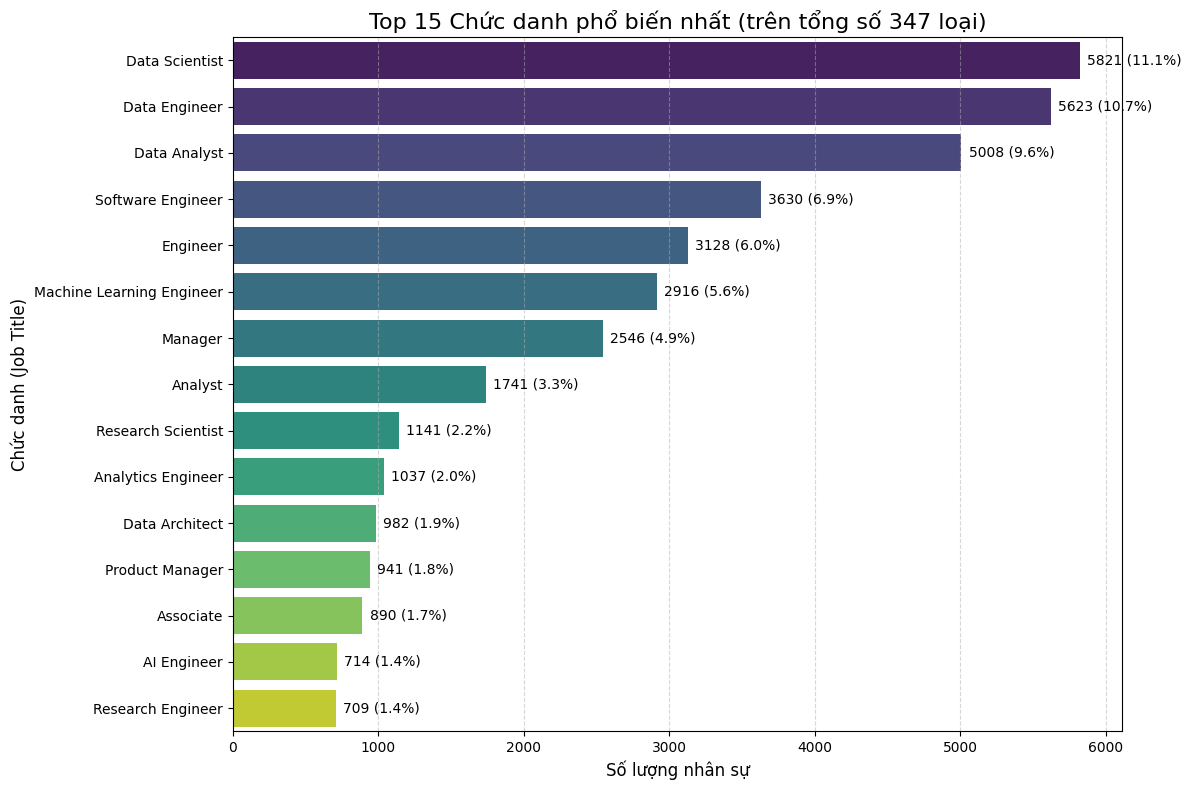

In [28]:
# 1. Thống kê cơ bản
num_unique_jobs = df['job_title'].nunique()
print(f"Tổng số lượng chức danh công việc khác nhau: {num_unique_jobs}")

# 2. Lấy Top 15 công việc phổ biến nhất
top_jobs = df['job_title'].value_counts().head(15)
top_jobs_percent = df['job_title'].value_counts(normalize=True).head(15) * 100

print("\n--- Top 15 Công việc phổ biến nhất ---")
display(top_jobs.to_frame(name='Số lượng')) # Hiển thị dạng bảng đẹp hơn
print("\n--- Tỷ lệ phần trăm (%) ---")
print(top_jobs_percent.round(2))

# 3. Trực quan hóa
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')

plt.title(f'Top 15 Chức danh phổ biến nhất (trên tổng số {num_unique_jobs} loại)', fontsize=16)
plt.xlabel('Số lượng nhân sự', fontsize=12)
plt.ylabel('Chức danh (Job Title)', fontsize=12)

# Thêm nhãn giá trị ở cuối mỗi thanh
for i, v in enumerate(top_jobs.values):
    ax.text(v + 50, i, f'{v} ({top_jobs_percent.values[i]:.1f}%)', 
            va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét về `job_title`:**

1.  **Sự đa dạng:**
    * Có tới **347** chức danh công việc khác nhau trong tập dữ liệu. Điều này phản ánh thực tế ngành dữ liệu chưa có quy chuẩn thống nhất về tên gọi (ví dụ: cùng làm ML nhưng có nơi gọi là *ML Engineer*, nơi gọi là *AI Specialist*). 
2.  **Top 3 vị trí dẫn đầu:**
    * **Data Scientist**, **Data Engineer**, và **Data Analyst** là 3 vị trí phổ biến nhất, chiếm tổng cộng khoảng **31%** thị trường.
    * Đáng chú ý: **Data Engineer** (Kỹ sư dữ liệu) có số lượng rất sát sao với Data Scientist. Điều này phản ánh xu hướng hiện nay: các công ty đang tập trung xây dựng hạ tầng dữ liệu vững chắc.
3.  **Sự trỗi dậy của AI/ML:**
    * Các vị trí liên quan đến AI/ML như **Machine Learning Engineer**, **AI Engineer**, **Research Scientist** cũng nằm trong Top 15, cho thấy nhu cầu cao về xây dựng mô hình thông minh.
4.  **Các chức danh chung chung:**
    * Xuất hiện các chức danh rất chung chung như "Software Engineer", "Engineer", "Manager", "Analyst". Có thể những vị trí này làm trong các team dữ liệu nhưng title vẫn giữ theo ngạch kỹ thuật truyền thống.
    * **Hành động tiềm năng:** Trong bước Tiền xử lý (Preprocessing), chúng ta có thể cân nhắc gộp các nhóm nhỏ lẻ (ví dụ: *Principal Data Scientist*, *Lead Data Scientist* -> gộp chung vào *Data Scientist* hoặc nhóm *Lead/Principal*) để giảm chiều dữ liệu.

### 2.2.5 `salary_in_usd`

Đây là biến quan trọng nhất để phục vụ bài toán dự đoán lương hoặc phân tích mức độ đãi ngộ. Nhóm sẽ sử dụng dùng mô hình học máy để dự đoán biến này.

**Mục tiêu:**
* Kiểm tra tính nhất quán dữ liệu giữa `salary`, `salary_currency` và `salary_in_usd`.
* Phân tích phân phối lương.
* Phát hiện các giá trị ngoại lai (Outliers).

**Phương pháp:**
1.  **Kiểm tra tính nhất quán (Consistency Check):**
    * Với `salary_currency` == 'USD', kiểm tra xem `salary` có bằng `salary_in_usd` không.
    * Với các loại tiền tệ khác, kiểm tra xem tỷ giá chuyển đổi (Exchange Rate) có hợp lý, ổn định và đồng nhất không.
2.  **Phân tích phân phối:**
    * Sử dụng Histogram và Boxplot.

Số lượng dòng lỗi (Currency='USD' nhưng salary != salary_in_usd): 0

--- Tỷ giá chuyển đổi trung bình theo năm (Top 5 Currencies) ---


salary_currency,CAD,EUR,GBP,INR,PLN
work_year,,,,,
2020,0.745884,1.140462,1.282635,0.013494,NaN
2021,0.797622,1.182048,1.375461,0.013523,0.258872
2022,0.768144,1.050661,1.231328,0.012718,0.224063
2023,0.740868,1.079674,1.230397,0.012161,0.232824
2024,0.769227,1.111103,1.249997,0.012005,0.250000
2025,0.714282,1.052621,1.265814,0.011824,0.245699


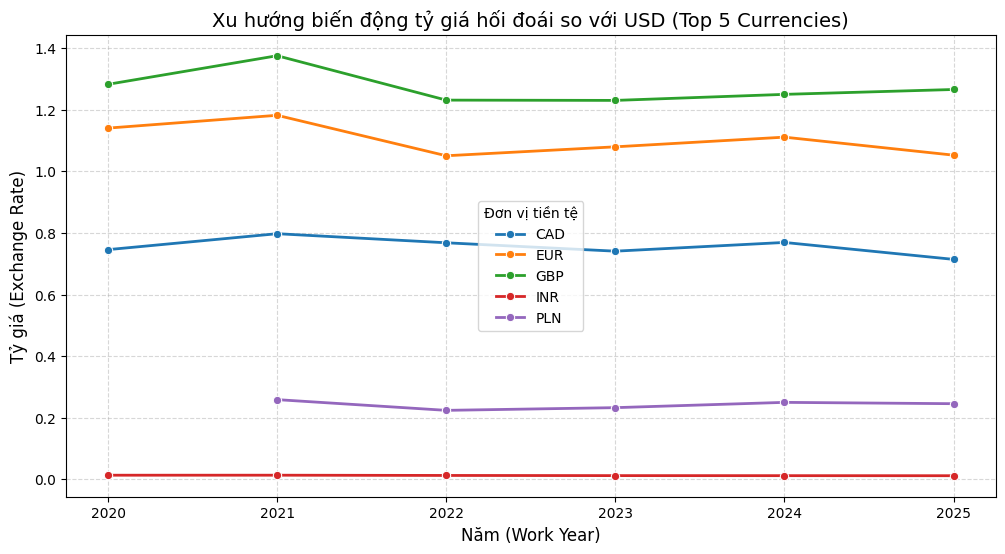

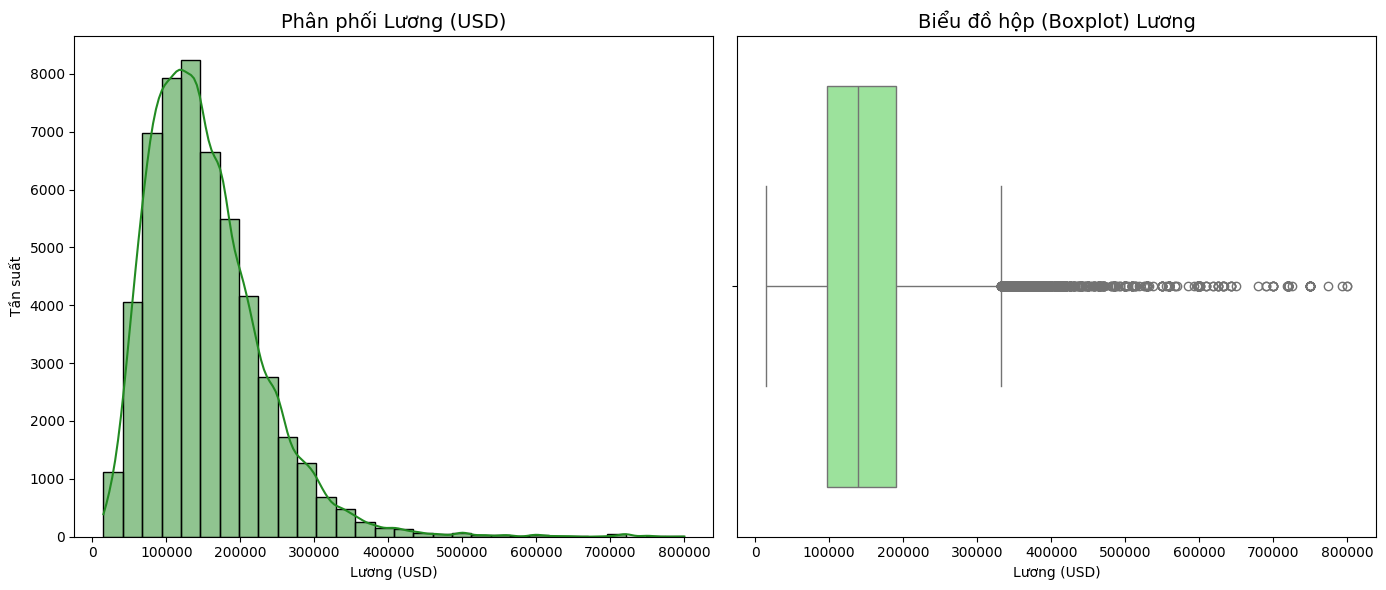


--- Thống kê mô tả Lương (USD) ---
count     52437.00
mean     151665.25
std       77828.83
min       15000.00
25%       96600.00
50%      139475.00
75%      191000.00
max      800000.00
Name: salary_in_usd, dtype: object


In [31]:
# --- 1. KIỂM TRA TÍNH NHẤT QUÁN ---

# A. Trường hợp Currency là USD
usd_df = df[df['salary_currency'] == 'USD']
inconsistent_usd = usd_df[usd_df['salary'] != usd_df['salary_in_usd']]
print(f"Số lượng dòng lỗi (Currency='USD' nhưng salary != salary_in_usd): {len(inconsistent_usd)}")

# B. Trường hợp Currency khác (Tính tỷ giá so với USD)
df['exchange_rate'] = df['salary_in_usd'] / df['salary']

# Xem thống kê tỷ giá của 5 đồng tiền phổ biến nhất 
top_currencies = df['salary_currency'].value_counts().index[1:6] # Bỏ qua top 1 là USD
print("\n--- Tỷ giá chuyển đổi trung bình theo năm (Top 5 Currencies) ---")
# Pivot table để xem tỷ giá thay đổi thế nào qua các năm
rate_table = df[df['salary_currency'].isin(top_currencies)].pivot_table(
    index='work_year', 
    columns='salary_currency', 
    values='exchange_rate', 
    aggfunc='mean'
)
display(rate_table)

# --- Vẽ biểu đồ xu hướng tỷ giá ---

# 1. Lọc dữ liệu của 5 đồng tiền phổ biến nhất (đã xác định ở trên)
df_currencies = df[df['salary_currency'].isin(top_currencies)].copy()

# 2. Tính tỷ giá trung bình theo từng năm và từng loại tiền tệ
# Dùng groupby để chuẩn bị dữ liệu cho biểu đồ line
rate_trends = df_currencies.groupby(['work_year', 'salary_currency'])['exchange_rate'].mean().reset_index()

# 3. Vẽ biểu đồ Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=rate_trends, 
             x='work_year', 
             y='exchange_rate', 
             hue='salary_currency', 
             marker='o',    # Thêm dấu chấm tròn tại các điểm dữ liệu
             linewidth=2,   # Độ dày đường
             palette='tab10') # Bảng màu phân biệt rõ

plt.title('Xu hướng biến động tỷ giá hối đoái so với USD (Top 5 Currencies)', fontsize=14)
plt.xlabel('Năm (Work Year)', fontsize=12)
plt.ylabel('Tỷ giá (Exchange Rate)', fontsize=12)
plt.legend(title='Đơn vị tiền tệ')
plt.grid(True, linestyle='--', alpha=0.5)

# Định dạng trục X chỉ hiện các năm nguyên (2020, 2021,...)
plt.xticks(sorted(df['work_year'].unique()))

plt.show()


# --- 2. PHÂN TÍCH PHÂN PHỐI LƯƠNG ---
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='forestgreen')
plt.title('Phân phối Lương (USD)', fontsize=14)
plt.xlabel('Lương (USD)')
plt.ylabel('Tần suất')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary_in_usd'], color='lightgreen')
plt.title('Biểu đồ hộp (Boxplot) Lương', fontsize=14)
plt.xlabel('Lương (USD)')

plt.tight_layout()
plt.show()

# Thống kê chi tiết
print("\n--- Thống kê mô tả Lương (USD) ---")
print(df['salary_in_usd'].describe().apply(lambda x: format(x, '.2f')))

Quan sát 10 điểm ngoại lai lương cao nhất xem họ làm việc ở đâu và chức vụ thế nào. 

In [ ]:
# Sắp xếp giảm dần theo lương và lấy 10 dòng đầu tiên
top_10_highest = df.sort_values(by='salary_in_usd', ascending=False).head(10)

# Chọn các cột quan trọng để hiển thị
cols_to_view = ['work_year', 'job_title', 'salary_in_usd', 'company_location', 'experience_level', 'company_size']

print("--- Top 10 lương cao nhất ---")
display(top_10_highest[cols_to_view])

--- Top 10 vị trí có mức lương cao nhất ---


,work_year,job_title,salary_in_usd,company_location,experience_level,company_size
91704,2024,AI Architect,800000,CA,MI,M
8240,2025,Software Engineer,800000,US,SE,M
25351,2025,Data Engineer,793136,AT,EN,M
92547,2024,Data Analyst,774000,MX,EN,M
93933,2024,Data Analyst,750000,US,SE,M
93522,2024,Machine Learning Scientist,750000,US,MI,M
6506,2025,Software Engineer,750000,US,SE,M
95312,2023,Machine Learning Engineer,750000,US,MI,M
93346,2024,Analytics Engineer,750000,US,SE,M
8550,2025,Analytics Engineer,750000,US,MI,M


**Nhận xét về Top 10 Lương cao nhất:**

1.  **Mức lương khủng:** Top 10 đều có mức lương từ **$750,000 đến $800,000**. Đây là con số rất lớn so với mức trung vị (~$139k).
2.  **Sự thống trị của thị trường Mỹ (US):**
    * 8/10 vị trí làm việc tại **Mỹ (US)**. Điều này củng cố thực tế rằng Mỹ là thị trường trả lương cao nhất cho ngành công nghệ.
3.  **Dấu hiệu bất thường (Cần lưu ý):**
    * Có 3 trường hợp đáng ngờ:
        * Một **AI Architect** ở **Canada (CA)** mức lương **cao nhất: $800,000** với kinh nghiệm **Mid-level** và còn là mức lương ở **2024**?
        -> *Khả năng cao là lỗi nhập liệu (typo) hoặc dữ liệu sai (ông này khai gian).* --> cân nhắc loại bỏ.
        * Một **Data Analyst** ở **Mexico (MX)** mức lương **$774,000** với kinh nghiệm **Entry-level (EN)** và còn là mức lương ở **2024**? -> *Khả năng cao là lỗi nhập liệu (typo) hoặc dữ liệu sai (ông này khai gian).* --> cân nhắc loại bỏ.
        * Một **Data Engineer** ở **Áo (AT)** mức lương **$793,136** cũng với kinh nghiệm **Entry-level (EN)**? -> *Rất phi lý.* --> cân nhắc loại bỏ.

    * Các vị trí còn lại ở Mỹ (Software Engineer, AI Architect) với mức lương $750k-$800k cho cấp độ Mid-level hoặc Senior là cao nhưng vẫn có thể xảy ra ở các tập đoàn Big Tech hoặc các vị trí niche về AI.

    * Đặc biệt sốc tới óc khi các sếp kinh nghiệm cao nhất (Executive-level) lại **không** có mặt trong **top 10** !?
4.  **Hành động đề xuất:**
    * Trong thực tế, ta nên đánh dấu các dòng "đáng ngờ" (Mexico và Áo nêu trên) để loại bỏ hoặc kiểm tra lại nguồn dữ liệu, vì chúng có thể làm méo mó kết quả phân tích nếu ta tính lương trung bình theo quốc gia hoặc theo kinh nghiệm.
    * Gợi ra thêm có cần kiểm tra top 10 lương thấp nhất ? Cũng như xem lương các sếp như nào (10 Ex lương cao nhất 10 Ex lương thấp nhất) (mà cái này để sau, để phần correlate xem xét sau).

In [ ]:
top_10_lowest = df.sort_values(by='salary_in_usd', ascending=True).head(10)

# Chọn các cột quan trọng để hiển thị
cols_to_view = ['work_year', 'job_title', 'salary_in_usd', 'company_location', 'experience_level', 'company_size']

print("--- Top 10 lương thấp nhất ---")
display(top_10_lowest[cols_to_view])

--- Top 10 lương cao nhất ---


,work_year,job_title,salary_in_usd,company_location,experience_level,company_size
101911,2020,Staff Data Analyst,15000,CA,EX,M
104539,2021,Machine Learning Developer,15000,TH,EN,L
99700,2022,Business Intelligence Developer,15000,GH,MI,M
104836,2022,Data Analyst,15000,ID,EN,L
51332,2024,BI Analyst,15107,PH,EN,M
77659,2022,Software Development Engineer,15129,RO,EN,L
17627,2025,Data Analyst,15157,FR,EN,M
22300,2025,Data Scientist,15281,TW,EN,M
22280,2025,Engineer,15281,TW,EN,M
21076,2025,Algorithm Developer,15281,TW,EN,M


**Nhận xét về Top 10 Lương thấp nhất:**

1.  **Mức sàn chung:** Mức lương thấp nhất trong bộ dữ liệu rơi vào khoảng **$15,000/năm**.
2.  **Yếu tố địa lý (Location):**
    * Phần lớn các mức lương này đến từ các quốc gia ở Châu Á hoặc Châu Phi như: **Indonesia (ID), Ghana (GH), Thái Lan (TH), Philippines (PH)**.
    * Với mức sống tại các quốc gia này, mức lương $15,000 (khoảng 30-35 triệu VND/tháng) cho vị trí Entry-level (EN) là **hoàn toàn hợp lý và khả thi**. Đây không phải là lỗi dữ liệu mà phản ánh sự chênh lệch mức sống toàn cầu. **(Bổ trợ cho câu hỏi (1))**
3.  **Dấu hiệu bất thường (Anomalies):**
    * Có một trường hợp rất đáng ngờ: **Staff Data Analyst** tại **Canada (CA)**, cấp độ **Executive (EX)** nhưng lương chỉ **$15,000**?
        * Mức lương tối thiểu tại Canada cao hơn nhiều con số này.
        * Vị trí Executive (quản lý cấp cao) không thể có mức lương này.
        * -> **Kết luận:** Đây chắc chắn là lỗi nhập liệu (Missing zero hoặc sai đơn vị). Cần loại bỏ dòng này.
    * Trường hợp tại **Pháp (FR)** ($15,157): Khá thấp so với mức lương tối thiểu châu Âu. Cần xem xét kỹ.

**Nhận xét về `salary_in_usd`:**

1.  **Tính nhất quán dữ liệu:**
    * **Rất tốt:** 100% các dòng có tiền tệ là USD đều khớp hoàn toàn giữa cột lương gốc và lương quy đổi.
    * **Tỷ giá:** Tỷ giá hối đoái biến động theo năm (`work_year`), phản ánh đúng thực tế kinh tế (ví dụ: tỷ giá EUR giảm mạnh vào năm 2022 so với 2021). Dữ liệu được chuyển đổi một cách hợp lý.

2.  **Phân phối lương:**
    * **Lệch phải (Right-skewed):** Đa số nhân sự có mức lương tập trung trong khoảng **$96k - $191k** (khoảng tứ phân vị IQR). Lương ngành này khủng quá.
    * **Ngoại lai (Outliers):** Xuất hiện nhiều giá trị ngoại lai ở phía bên phải (lương cao đột biến).
        * Giá trị lớn nhất lên tới **$800,000**.
        * Các giá trị > $350,000 khá hiếm và nằm tách biệt hẳn so với đám đông.
    * **Hàm ý:** Khi xây dựng mô hình dự đoán, cần lưu ý các giá trị ngoại lai này (có thể dùng Robust Scaler hoặc Log Transformation để giảm ảnh hưởng).

3. **Insight:**
Ban đầu nhìn dữ liệu có vẻ sạch, không thiếu, nhất quán, nhưng khi xem xét sâu hơn thì có vẻ vẫn còn sai sót, không hợp lý, kiểm tra thêm thì có thể phát hiện ra thêm, tuy nhiên đây chỉ là hạt cát trên sa mạc chứ không phải con sâu làm rầu nồi canh, chỉ một vài đến vài chục dòng đáng ngờ trên tổng hơn 50k dòng, hoàn toàn châm chước được.

### 2.2.6 `company_size` (Quy mô công ty)

Biến này phân loại quy mô của công ty nơi nhân sự làm việc, thường dựa trên số lượng nhân viên.

Các giá trị viết tắt và ý nghĩa (dựa trên chuẩn dữ liệu phổ biến):
* **S (Small):** Công ty nhỏ (thường < 50 nhân viên).
* **M (Medium):** Công ty vừa (thường 50 - 250 nhân viên).
* **L (Large):** Công ty lớn (thường > 250 nhân viên).

**Mục tiêu:**
* Xem xét nhân sự ngành Data Science thường làm việc ở loại hình công ty nào.
* Phân bố công ty trong tập dữ liệu này.

**Phương pháp:**
* Thống kê số lượng và tỷ lệ phần trăm.
* Trực quan hóa bằng biểu đồ tròn (Pie Chart) hoặc biểu đồ cột (Bar Chart) để thấy sự chênh lệch.

--- Số lượng nhân sự theo quy mô công ty ---
company_size
M    50855
L     1371
S      211
Name: count, dtype: int64

--- Tỷ lệ phần trăm (%) ---
company_size
M    96.98
L     2.61
S     0.40
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\116529011.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='company_size', order=order_size, palette='pastel')


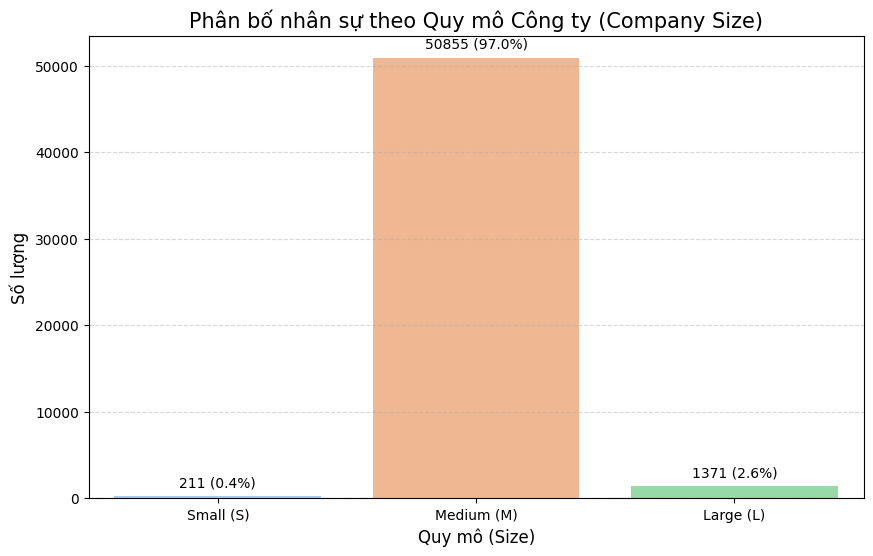

In [34]:
# 1. Thống kê số lượng
size_counts = df['company_size'].value_counts()
size_pct = df['company_size'].value_counts(normalize=True) * 100

print("--- Số lượng nhân sự theo quy mô công ty ---")
print(size_counts)
print("\n--- Tỷ lệ phần trăm (%) ---")
print(size_pct.round(2))

# 2. Mapping tên đầy đủ
size_mapping = {
    'S': 'Small (S)',
    'M': 'Medium (M)',
    'L': 'Large (L)'
}

# 3. Trực quan hóa
plt.figure(figsize=(10, 6))

# Sắp xếp theo thứ tự kích thước: S -> M -> L
order_size = ['S', 'M', 'L']

ax = sns.countplot(data=df, x='company_size', order=order_size, palette='pastel')

# Thêm nhãn giá trị
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({p.get_height()/len(df)*100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Phân bố nhân sự theo Quy mô Công ty (Company Size)', fontsize=15)
plt.xlabel('Quy mô (Size)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(ticks=range(3), labels=[size_mapping[s] for s in order_size])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét về `company_size`:**

1.  **Sự thống trị của Công ty quy mô Vừa (Medium - M):**
    * Nhóm **M** chiếm tỷ lệ áp đảo tuyệt đối với **97%** .
    * Điều này cho thấy đa số cơ hội việc làm trong dữ liệu này đến từ các công ty tầm trung, hoặc xu hướng là các công ty vừa đang tuyển dụng nhân sự dữ liệu nhiều nhất.
2.  **Công ty Lớn (L) và Nhỏ (S) chiếm thiểu số:**
    * Nhóm **L** chỉ chiếm khoảng **2.6%**.
    * Nhóm **S** chiếm tỷ lệ không đáng kể (**~0.4%**).
3.  **Hàm ý phân tích:**
    * Tương tự như biến `employment_type`, biến `company_size` bị mất cân bằng nghiêm trọng (imbalanced).
    * Khi phân tích các yếu tố ảnh hưởng đến lương, kích thước công ty có thể không phải là yếu tố phân loại tốt trong tập dữ liệu này vì hầu hết đều là 'M'. Sự khác biệt về lương giữa 'M' và các nhóm còn lại có thể khó kiểm định thống kê do mẫu của nhóm 'S' và 'L' quá nhỏ.

### 2.2.7 `company_location`

Biến này cho biết quốc gia nơi công ty đặt trụ sở chính hoặc chi nhánh tuyển dụng. Dữ liệu được lưu dưới dạng mã quốc gia ISO 3166 (2 ký tự, ví dụ: US, GB, CA).

**Mục tiêu:**
* Xác định các trung tâm công nghệ (tech hubs) chính trên thế giới dựa trên số lượng tuyển dụng.
* Kiểm tra mức độ đa dạng địa lý của dữ liệu.

**Phương pháp:**
* Lọc ra Top 15 quốc gia phổ biến nhất để vẽ biểu đồ.

Tổng số quốc gia có trong dữ liệu: 92

--- Top 15 Quốc gia chiếm nhiều nhất ---


,Số lượng
company_location,
US,44305
CA,3057
GB,2079
AU,332
DE,272
NL,245
LT,229
FR,215
ES,160



--- Tỷ lệ phần trăm (%) ---
company_location
US    84.49
CA     5.83
GB     3.96
AU     0.63
DE     0.52
NL     0.47
LT     0.44
FR     0.41
ES     0.31
IN     0.26
AT     0.23
PL     0.17
IE     0.17
SK     0.16
MX     0.14
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\4054999998.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')


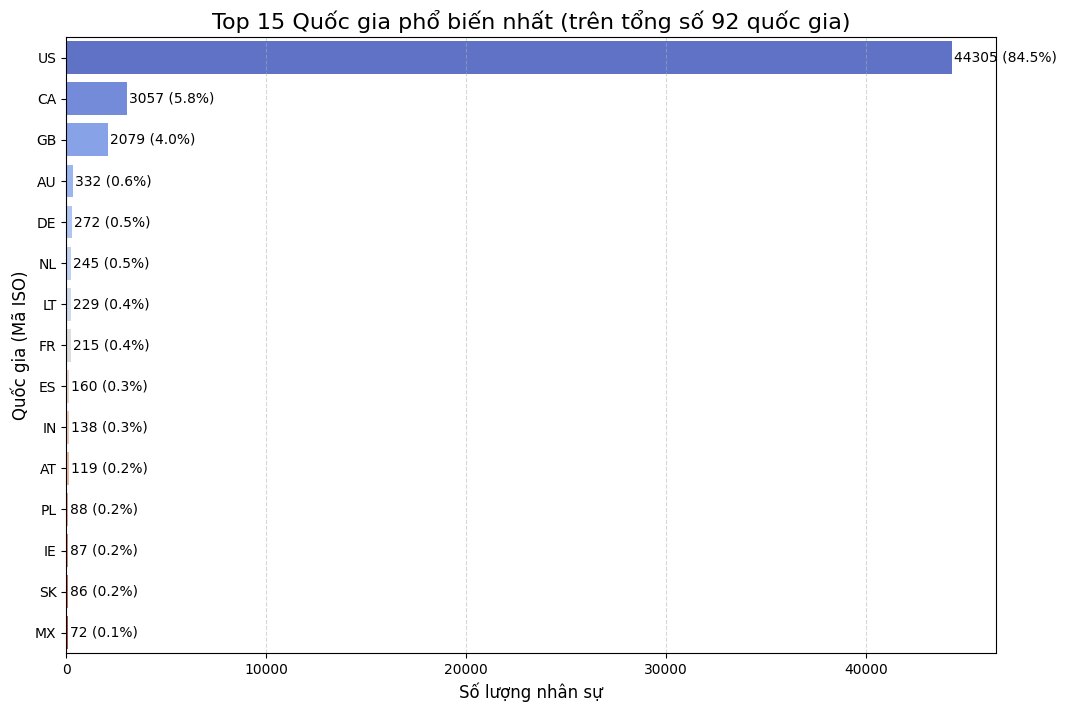

In [43]:
# 1. Thống kê cơ bản
num_locations = df['company_location'].nunique()
print(f"Tổng số quốc gia có trong dữ liệu: {num_locations}")

# 2. Lấy Top 15 quốc gia phổ biến nhất
top_locations = df['company_location'].value_counts().head(15)
top_loc_percent = df['company_location'].value_counts(normalize=True).head(15) * 100

print("\n--- Top 15 Quốc gia chiếm nhiều nhất ---")
display(top_locations.to_frame(name='Số lượng'))
print("\n--- Tỷ lệ phần trăm (%) ---")
print(top_loc_percent.round(2))

# 3. Trực quan hóa
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')

plt.title(f'Top 15 Quốc gia phổ biến nhất (trên tổng số {num_locations} quốc gia)', fontsize=16)
plt.xlabel('Số lượng nhân sự', fontsize=12)
plt.ylabel('Quốc gia (Mã ISO)', fontsize=12)

# Thêm nhãn giá trị
for i, v in enumerate(top_locations.values):
    ax.text(v + 100, i, f'{v} ({top_loc_percent.values[i]:.1f}%)', 
            va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét về `company_location`:**

1.  **Sự áp đảo của Mỹ (US):**
    * Mỹ chiếm vị trí số 1 tuyệt đối với khoảng **84.5%** tổng số lượng bản ghi.
    * Canada (CA) và Anh (GB) đứng thứ 2 và 3 nhưng khoảng cách rất xa (khoảng 4-6%).
2.  **Tính đại diện của dữ liệu:**
    * Dữ liệu này **phản ánh chủ yếu thị trường Bắc Mỹ (North America)**.
    * Các kết luận rút ra từ bộ dữ liệu này (về lương, xu hướng công nghệ) sẽ **đúng nhất với thị trường Mỹ** và có thể không hoàn toàn chính xác cho thị trường Châu Á hay Châu Âu do mẫu quá nhỏ.
3.  **Hàm ý cho mô hình dự đoán:**
    * Biến `company_location` có thể gây nhiễu nếu dùng trực tiếp vì đa số là "US".
    * Có thể cân nhắc gom nhóm lại thành: "US" và "Non-US" (hoặc theo châu lục: North America, Europe, Asia...) để giảm chiều dữ liệu và cân bằng hơn khi đưa vào mô hình Machine Learning.

### 2.2.8 `remote_ratio` 

Biến này cho biết mức độ linh hoạt trong công việc:
* **0:** Làm việc tại văn phòng (On-site).
* **50:** Làm việc kết hợp (Hybrid).
* **100:** Làm việc từ xa hoàn toàn (Remote).

**Mục tiêu:**
* Xác định xu hướng làm việc hiện tại của ngành.
* Kiểm tra xem hình thức Remote hay On-site đang chiếm ưu thế.

**Phương pháp:**
* Thống kê số lượng và tỷ lệ.
* Vẽ biểu đồ cột (Bar Chart).

--- Số lượng theo hình thức làm việc ---
remote_ratio
0      39310
100    12821
50       306
Name: count, dtype: int64

--- Tỷ lệ phần trăm (%) ---
remote_ratio
0      74.97
100    24.45
50      0.58
Name: proportion, dtype: float64


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\4169877609.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='remote_ratio', palette='viridis')
C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\4169877609.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['On-site (0%)', 'Hybrid (50%)', 'Remote (100%)'])


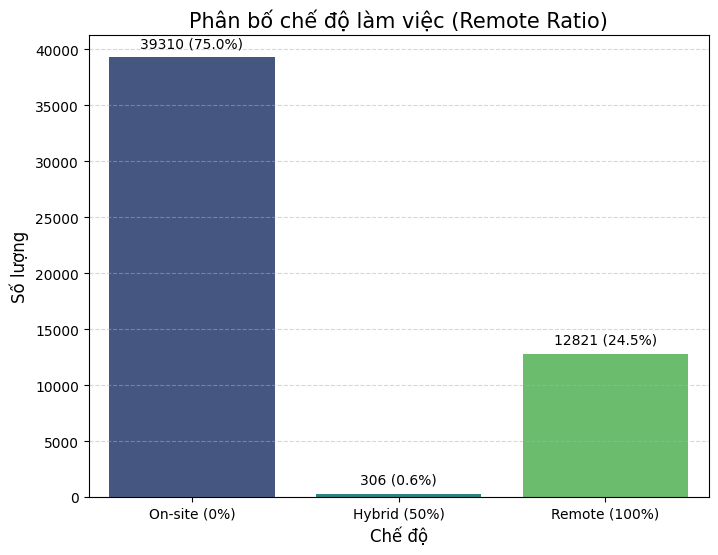

In [48]:
# 1. Thống kê số lượng
remote_counts = df['remote_ratio'].value_counts()
remote_pct = df['remote_ratio'].value_counts(normalize=True) * 100

print("--- Số lượng theo hình thức làm việc ---")
print(remote_counts)
print("\n--- Tỷ lệ phần trăm (%) ---")
print(remote_pct.round(2))

# 2. Trực quan hóa
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='remote_ratio', palette='viridis')

# Gán nhãn trục X cho dễ hiểu
ax.set_xticklabels(['On-site (0%)', 'Hybrid (50%)', 'Remote (100%)'])

# Thêm nhãn giá trị
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({p.get_height()/len(df)*100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Phân bố chế độ làm việc (Remote Ratio)', fontsize=15)
plt.xlabel('Chế độ', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét về `remote_ratio`:**
1.  **On-site vẫn chiếm ưu thế:** Mặc dù ngành công nghệ nổi tiếng với văn hóa làm việc từ xa, nhưng dữ liệu cho thấy **75%** vị trí là làm việc tại văn phòng (On-site).
2.  **Sự phân cực (Polarization):**
    * Thị trường có xu hướng chọn cực đoan: hoặc là đến công ty hoàn toàn (0), hoặc là ở nhà hoàn toàn (100).
    * Hình thức **Hybrid (50%)** chiếm tỷ lệ cực thấp (**< 1%**). Điều này có thể do cách ghi nhận dữ liệu (quy ước 50 là một con số tượng trưng) hoặc thực tế các công ty ít tuyển dụng vị trí "nửa nọ nửa kia" chính thức.

# 2.3 Phân tích sự tương quan (Multivariate Analysis)

**Thuộc tính mục tiêu (Target):** `salary_in_usd` (Lương quy đổi USD).

Trong phần này, chúng ta sẽ khám phá mối quan hệ giữa biến mục tiêu (Salary) và các biến độc lập khác (`work_year`, `experience_level`, `job_title`...). Mục đích là để tìm ra những yếu tố nào ảnh hưởng mạnh nhất đến mức lương của một nhân sự ngành dữ liệu.

**Chiến lược chung:**
1.  **Làm sạch nâng cao:** Loại bỏ các điểm ngoại lai cụ thể (đã phát hiện ở bước 2.2) để tránh làm sai lệch kết quả trung bình.
2.  **Feature Engineering (Tạo nhóm):** Gom nhóm các biến có quá nhiều giá trị (như `job_title`, `company_location`) thành các nhóm lớn hơn để dễ quan sát xu hướng chung.
3.  **Phân tích tương quan:**
    * Lương theo Năm (Trend thời gian).
    * Lương theo Kinh nghiệm & Vị trí (Yếu tố con người).
    * Lương theo Địa lý & Quy mô công ty (Yếu tố môi trường).

In [37]:
# Tạo bản sao để không ảnh hưởng dữ liệu gốc
df_corr = df.copy()

# --- 1. LÀM SẠCH NÂNG CAO (Advanced Cleaning) ---
# Loại bỏ các anomalies cụ thể đã phát hiện ở phần 2.2
# Lý do: Các giá trị này (như lương $15k cho Executive ở Canada, hay $774k cho Entry-level ở Mexico)
# rất phi lý và sẽ làm méo mó giá trị trung bình (mean) khi gom nhóm.

# a. Canada Executive lương quá thấp ($15k)
idx_anomaly_1 = df_corr[(df_corr['company_location'] == 'CA') & 
                        (df_corr['job_title'] == 'Staff Data Analyst') & 
                        (df_corr['salary_in_usd'] < 20000)].index

# b. Mexico & Austria Entry-level lương quá cao (>$700k)
idx_anomaly_2 = df_corr[(df_corr['company_location'].isin(['MX', 'AT'])) & 
                        (df_corr['salary_in_usd'] > 700000)].index

# Thực hiện xóa
df_corr = df_corr.drop(idx_anomaly_1.union(idx_anomaly_2))
print(f"Đã loại bỏ {len(idx_anomaly_1) + len(idx_anomaly_2)} dòng dữ liệu nhiễu (anomalies).")

# --- 2. GOM NHÓM DỮ LIỆU (Grouping) ---
# Lý do: Biến job_title có tới 347 giá trị, company_location có 92 giá trị.
# Nếu để nguyên sẽ rất khó vẽ biểu đồ và nhìn ra pattern chung.

# a. Gom nhóm Job Title thành 6 nhóm chính
def categorize_job(title):
    """
    Phân loại chức danh công việc dựa trên các từ khóa xuất hiện trong tiêu đề.

    Tham số
    -------
    title : str
        Tên/chức danh công việc cần được phân loại.

    Giá trị trả về
    --------------
    str
        Một trong các nhóm sau, tùy theo từ khóa được phát hiện:
        - 'Data Scientist / Research' : nếu chứa 'scientist' hoặc 'research'
        - 'ML / AI Engineer'          : nếu chứa các từ liên quan đến ML/AI 
                                        (ví dụ: 'machine learning', 'ai ', 'ml ')
        - 'Data / Software Engineer'  : nếu chứa 'engineer' hoặc 'architect'
        - 'Data Analyst'              : nếu chứa các từ liên quan đến phân tích dữ liệu 
                                        (ví dụ: 'analyst', 'analytics', 'bi', 'business intelligence')
        - 'Manager / Lead'            : nếu chứa các từ liên quan đến quản lý 
                                        (ví dụ: 'manager', 'lead', 'head', 'director')
        - 'Other'                     : nếu không khớp bất kỳ nhóm nào ở trên.

    Ghi chú
    -------
    Hàm sẽ tự chuyển tên chức danh về dạng chữ thường (lowercase) để so khớp từ khóa không phân biệt hoa/thường.
    """
    title_lower = title.lower()
    if 'scientist' in title_lower or 'research' in title_lower:
        return 'Data Scientist / Research'
    elif 'engineer' in title_lower or 'architect' in title_lower:
        # Tách riêng ML Engineer vì thường lương cao hơn Software/Data Eng
        if any(x in title_lower for x in ['machine learning', 'ai ', 'ml ']):
            return 'ML / AI Engineer'
        return 'Data / Software Engineer'
    elif any(x in title_lower for x in ['analyst', 'analytics', 'bi ', 'business intelligence']):
        return 'Data Analyst'
    elif any(x in title_lower for x in ['manager', 'lead', 'head', 'director']):
        return 'Manager / Lead'
    else:
        return 'Other'


df_corr['job_category'] = df_corr['job_title'].apply(categorize_job)

# b. Gom nhóm Location (Top 5 vs Others)
top_5_locs = df_corr['company_location'].value_counts().head(5).index.tolist()
df_corr['location_group'] = df_corr['company_location'].apply(lambda x: x if x in top_5_locs else 'Other')

print("Phân bố sau khi gom nhóm Job Category:")
print(df_corr['job_category'].value_counts())

Đã loại bỏ 3 dòng dữ liệu nhiễu (anomalies).
Phân bố sau khi gom nhóm Job Category:
job_category
Data / Software Engineer     19080
Data Analyst                  9923
Data Scientist / Research     9501
Manager / Lead                5107
Other                         4880
ML / AI Engineer              3943
Name: count, dtype: int64


### 2.3.1 Tương quan: Lương và Thời gian (`work_year`)

**Mục tiêu quan sát:**
* Kiểm tra xem mức lương trong ngành có xu hướng tăng theo thời gian không (Trend analysis).
* So sánh mức tăng trưởng trung bình qua các năm.

**Phương pháp:**
* Gom nhóm theo `work_year`.
* Tính `mean` và `median` của `salary_in_usd`.
* Vẽ biểu đồ đường (Line Plot) để thấy rõ xu hướng.

Bảng thống kê lương theo năm:


,work_year,mean,median,std
0,2020,103429.93,82416.5,82650.03
1,2021,99309.71,82528.0,67254.06
2,2022,131118.62,129300.0,61582.83
3,2023,150092.41,142200.0,70191.28
4,2024,152289.13,140000.0,77056.70
5,2025,153067.53,139600.0,80900.47


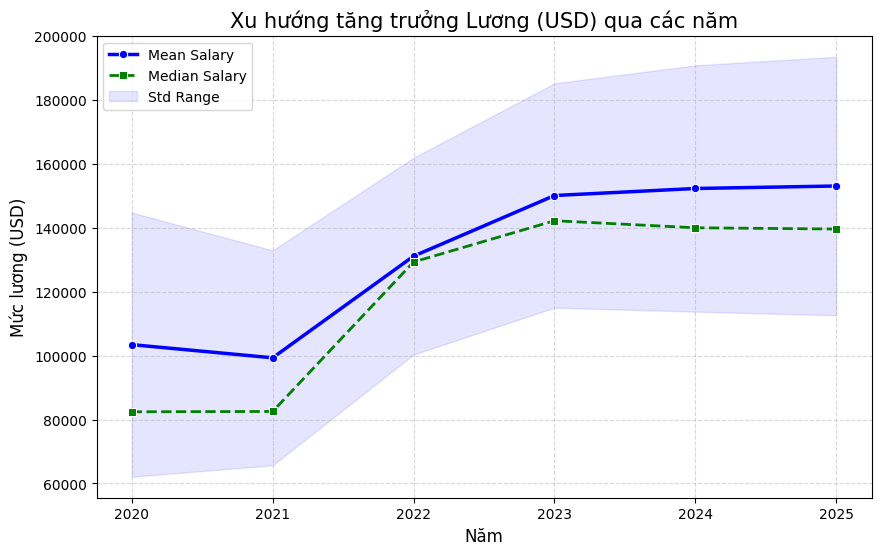

In [40]:
# 1. Tính toán thống kê
salary_trend = df_corr.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index()

print("Bảng thống kê lương theo năm:")
display(salary_trend.round(2))

# 2. Trực quan hóa
plt.figure(figsize=(10, 6))

# Vẽ đường Mean (Trung bình)
sns.lineplot(data=salary_trend, x='work_year', y='mean', marker='o', label='Mean Salary', color='blue', linewidth=2.5)
# Vẽ đường Median (Trung vị)
sns.lineplot(data=salary_trend, x='work_year', y='median', marker='s', label='Median Salary', color='green', linestyle='--', linewidth=2)

# Tô màu khoảng tin cậy (Standard Deviation - độ lệch chuẩn) để thấy độ phân tán
plt.fill_between(salary_trend['work_year'], 
                 salary_trend['mean'] - salary_trend['std']/2, 
                 salary_trend['mean'] + salary_trend['std']/2, 
                 color='blue', alpha=0.1, label='Std Range')

plt.title('Xu hướng tăng trưởng Lương (USD) qua các năm', fontsize=15)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Mức lương (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Nhận xét:**
* **Xu hướng tăng trưởng rõ rệt:** Từ năm 2021 đến 2024, mức lương trung bình có sự tăng trưởng mạnh mẽ (từ ~$99k lên ~$152k).
* **Sự ổn định gần đây:** Giữa năm 2024 và 2025, đường biểu diễn đi ngang, cho thấy mức lương có dấu hiệu bão hòa hoặc đạt đỉnh ngắn hạn.
* **Chênh lệch Mean - Median:** Đường Mean (Xanh dương) luôn nằm trên đường Median (Xanh lá), chứng tỏ phân phối lương luôn bị lệch phải (có một số ít người lương rất cao kéo mức trung bình lên).

### 2.3.2 Tương quan: Lương và Kinh nghiệm (`experience_level`)

**Mục tiêu quan sát:**
* Kiểm chứng giả thuyết: Kinh nghiệm càng cao thì lương càng cao.
* Quan sát mức độ chênh lệch lương giữa các cấp bậc (gap salary).

**Phương pháp:**
* Sử dụng Boxplot để so sánh phân phối lương của từng nhóm kinh nghiệm.
* Sắp xếp theo thứ tự thăng tiến: EN -> MI -> SE -> EX.

C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\3758587644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_corr, x='experience_level', y='salary_in_usd', order=order_exp, palette='viridis')


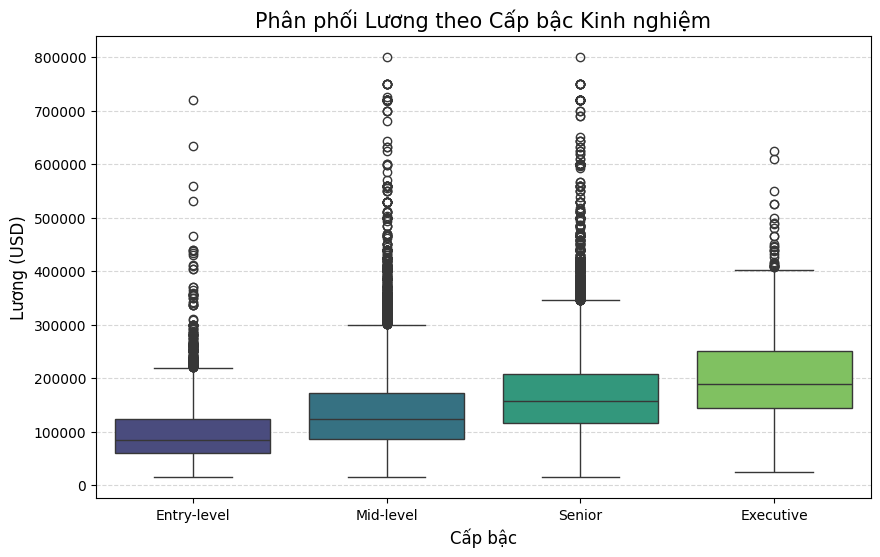

Mức lương trung bình theo cấp bậc:
experience_level
EN     85448.5
MI    124000.0
SE    157500.0
EX    190000.0
Name: salary_in_usd, dtype: float64


In [41]:
plt.figure(figsize=(10, 6))

# Thứ tự mong muốn
order_exp = ['EN', 'MI', 'SE', 'EX']
labels_exp = ['Entry-level', 'Mid-level', 'Senior', 'Executive']

sns.boxplot(data=df_corr, x='experience_level', y='salary_in_usd', order=order_exp, palette='viridis')

plt.title('Phân phối Lương theo Cấp bậc Kinh nghiệm', fontsize=15)
plt.xlabel('Cấp bậc', fontsize=12)
plt.ylabel('Lương (USD)', fontsize=12)
plt.xticks(ticks=range(4), labels=labels_exp)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# In giá trị trung bình cụ thể
print("Mức lương trung bình theo cấp bậc:")
print(df_corr.groupby('experience_level')['salary_in_usd'].median().reindex(order_exp))

**Nhận xét:**
* **Quy luật thăng tiến:** Biểu đồ xác nhận rõ ràng giả thuyết "Kinh nghiệm tăng -> Lương tăng". Các hộp (box) nâng dần độ cao từ trái qua phải.
* **Độ biến động:** Nhóm Executive (EX) có dải lương (độ cao của hộp) rộng nhất, chứng tỏ mức lương lãnh đạo biến động rất mạnh tùy thuộc vào công ty và trách nhiệm.

### 2.3.3 Tương quan: Lương và Nhóm công việc (`job_title` / `job_category`)

**Mục tiêu quan sát:**
* Xác định nhóm công việc nào đang có mức đãi ngộ cao nhất thị trường (High-paying roles).
* So sánh sự chênh lệch lương giữa các vị trí kỹ thuật (Engineer/Scientist) và vị trí phân tích (Analyst).

**Phương pháp:**
* Sử dụng biến `job_category` đã gom nhóm ở bước chuẩn bị.
* Tính trung vị lương (Median) cho từng nhóm để so sánh (dùng Median tốt hơn Mean vì lương thường bị lệch phải).
* Vẽ biểu đồ thanh ngang (Horizontal Bar Chart) đã sắp xếp để dễ quan sát.

Bảng thống kê lương theo nhóm công việc:


,job_category,median,mean,count
3,ML / AI Engineer,174175.0,186855.993913,3943
4,Manager / Lead,155000.0,167083.130801,5107
0,Data / Software Engineer,151361.5,163705.563784,19080
2,Data Scientist / Research,150000.0,161539.668456,9501
5,Other,112911.5,124599.205328,4880
1,Data Analyst,101000.0,110338.301421,9923


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\2918203558.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_salary, x='median', y='job_category', palette='magma')


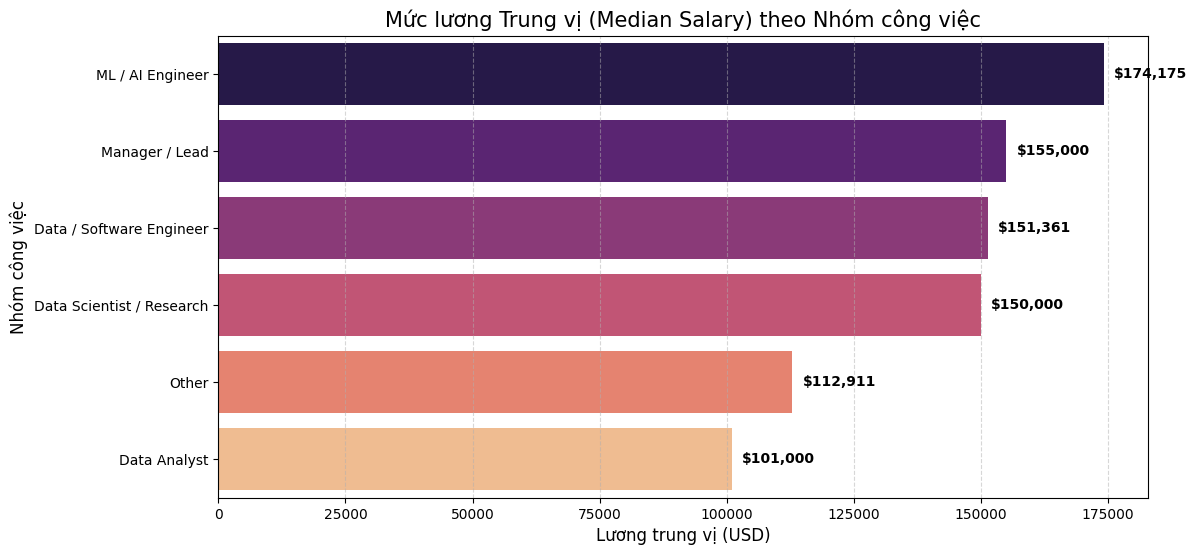

In [42]:
# 1. Tính toán thống kê
# Nhóm theo category và tính lương trung bình + trung vị
job_salary = df_corr.groupby('job_category')['salary_in_usd'].agg(['median', 'mean', 'count']).reset_index()
# Sắp xếp giảm dần theo Median để vẽ đẹp hơn
job_salary = job_salary.sort_values(by='median', ascending=False)

print("Bảng thống kê lương theo nhóm công việc:")
display(job_salary)

# 2. Trực quan hóa
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ
sns.barplot(data=job_salary, x='median', y='job_category', palette='magma')

# Thêm nhãn giá trị lên biểu đồ
for i, v in enumerate(job_salary['median']):
    plt.text(v + 2000, i, f"${int(v):,}", va='center', fontsize=10, fontweight='bold')

plt.title('Mức lương Trung vị (Median Salary) theo Nhóm công việc', fontsize=15)
plt.xlabel('Lương trung vị (USD)', fontsize=12)
plt.ylabel('Nhóm công việc', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét:**
1.  **Top Income:**
    * **ML / AI Engineer** dẫn đầu thị trường với mức lương trung vị cao nhất (~$174,000). Điều này phản ánh xu hướng "hot" của trí tuệ nhân tạo hiện nay.
    * **Manager / Lead** đứng ngay sau. Điều này hợp lý vì trách nhiệm quản lý luôn đi kèm mức đãi ngộ cao.
2.  **Kỹ thuật vs. Phân tích:**
    * Các nhóm kỹ thuật (**Data Scientist**, **Data Engineer**) có mức lương khá tương đồng nhau (~$150,000 - $155,000) và cao hơn đáng kể so với nhóm phân tích.
    * **Data Analyst** có mức lương thấp nhất trong các nhóm chuyên môn (~$101,000). Đây là vị trí thường có rào cản gia nhập thấp hơn và nguồn cung nhân lực dồi dào hơn. 

### 2.3.4 Tương quan: Lương và Vị trí địa lý (`location_group`)

**Mục tiêu quan sát:**
* Kiểm chứng sự chênh lệch mức lương giữa thị trường Mỹ (US) và phần còn lại của thế giới.
* Xem xét liệu làm việc tại các trung tâm công nghệ lớn (Top Hubs) có thực sự mang lại thu nhập cao hơn không.

**Phương pháp:**
* So sánh lương giữa các nhóm quốc gia phổ biến (US, CA, GB, DE, AU) và nhóm 'Other'.
* Sử dụng **Boxplot** để không chỉ xem mức trung bình mà còn xem độ phân tán (dải lương) ở từng quốc gia.

C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\4018165368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_corr, x='location_group', y='salary_in_usd', order=loc_order, palette='Set2')


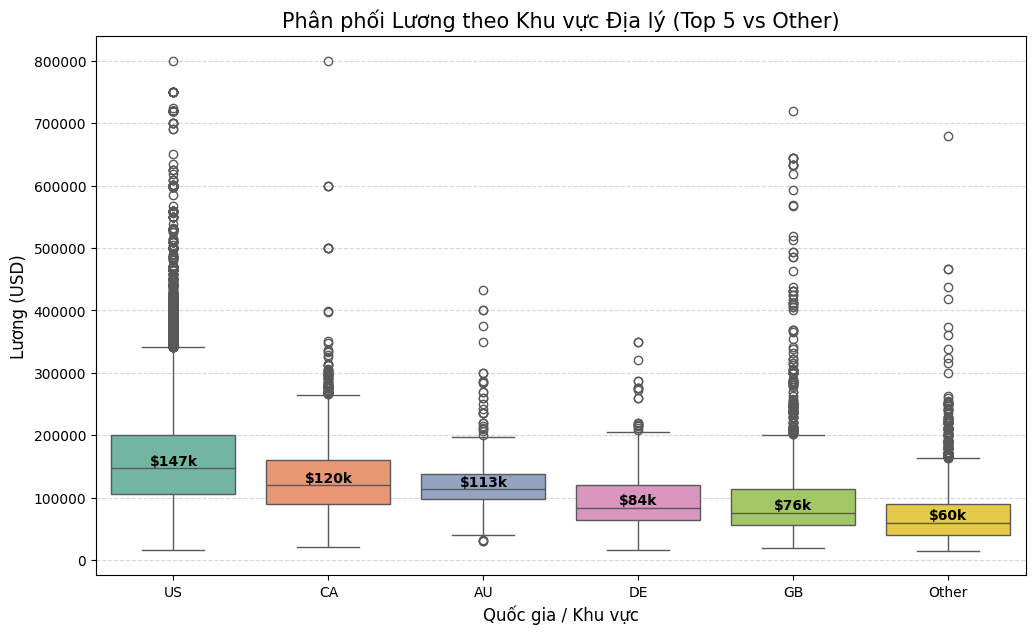

In [46]:
# 1. Chuẩn bị dữ liệu sắp xếp
# Tính median để sắp xếp thứ tự hiển thị trên biểu đồ
loc_order = df_corr.groupby('location_group')['salary_in_usd'].median().sort_values(ascending=False).index

# 2. Trực quan hóa
plt.figure(figsize=(12, 7))

sns.boxplot(data=df_corr, x='location_group', y='salary_in_usd', order=loc_order, palette='Set2')

plt.title('Phân phối Lương theo Khu vực Địa lý (Top 5 vs Other)', fontsize=15)
plt.xlabel('Quốc gia / Khu vực', fontsize=12)
plt.ylabel('Lương (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị thêm giá trị Median cụ thể để dễ so sánh
medians = df_corr.groupby('location_group')['salary_in_usd'].median().reindex(loc_order)
for i, m in enumerate(medians):
    plt.text(i, m + 5000, f"${int(m/1000)}k", ha='center', fontweight='bold', color='black')

plt.show()

**Nhận xét:**

1.  **Sự vượt trội của thị trường Mỹ (US):**
    * **Dẫn đầu về mức lương:** Mỹ (US) có mức lương trung vị (median) cao nhất **$147,000**.
    * **Phân phối cao:** Hộp dữ liệu (IQR - khoảng giữa 50% nhân sự) của Mỹ nằm ở vùng rất cao (từ khoảng **$100,000** đến gần **$200,000**), cao hơn hẳn so với mức trung bình của tất cả các quốc gia khác. Một người bình thường ở Mỹ cũng có thể có lương cao hơn hầu hết người cùng vị trí ở nước khác (tuy nhiên thì cũng tùy mức sống, mức sống ở Mỹ cao hơn, cũng không nói lên được quá nhiều).

2.  **Sự phân hóa trong nhóm các nước phát triển:**
    * **Canada (CA), Úc (AU):** Đứng thứ hai, thứ ba sau Mỹ, với mức trung vị lần lượt là **$120,000**, **$113,000**.
    * **Nhóm Anh (GB), Đức (DE)** Có mức lương khá tương đồng nhau và thấp hơn Canada, Úc khá đáng kể, dao động trong khoảng trung vị từ **$75,000 - $85,000**.

3.  **Nhóm còn lại (Other):**
    * Có mức lương trung vị thấp nhất (dưới $60,000). Đây là nhóm tập hợp nhiều quốc gia có chi phí sinh hoạt thấp hơn hoặc thị trường công nghệ chưa trả lương cạnh tranh bằng các Top Hubs kể trên.

### 2.3.5 Tương quan: Lương và Chế độ làm việc (`remote_ratio`)

**Mục tiêu quan sát:**
* Trả lời câu hỏi: "Làm Remote lương có thấp hơn On-site không?" (Do có quan điểm cho rằng làm Remote thường bị cắt giảm phụ cấp địa phương).
* So sánh mức đãi ngộ giữa 3 nhóm.

**Phương pháp:**
* Gom nhóm theo `remote_ratio`.
* Tính lương trung vị (Median).
* Vẽ Boxplot so sánh.

Thống kê lương theo chế độ làm việc:


,mean,median,count
remote_ratio,,,
0,153299.0,140000.0,39307
50,81336.0,68276.0,306
100,148248.0,140000.0,12821


C:\Users\MSI\AppData\Local\Temp\ipykernel_6616\930793977.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_corr, x='remote_ratio', y='salary_in_usd', palette='coolwarm')


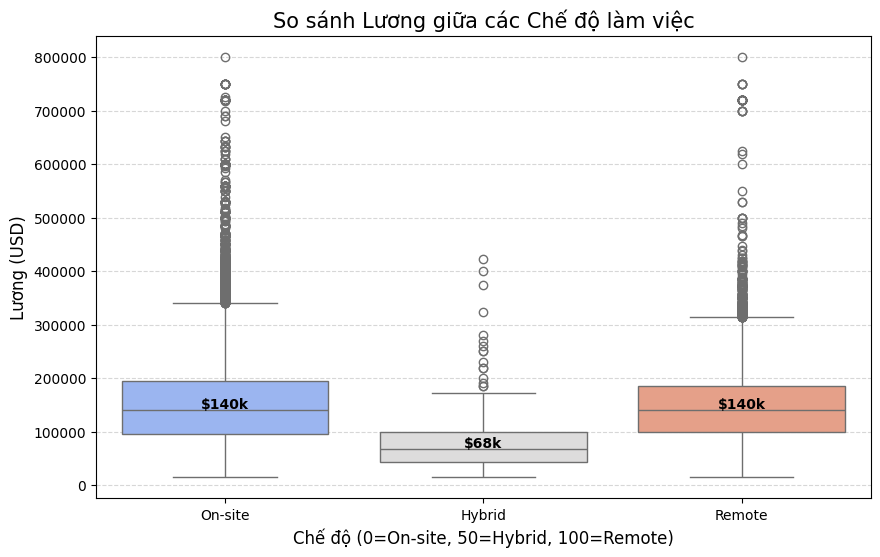

In [49]:
# 1. Thống kê lương trung vị theo nhóm
remote_salary = df_corr.groupby('remote_ratio')['salary_in_usd'].agg(['mean', 'median', 'count'])
print("Thống kê lương theo chế độ làm việc:")
display(remote_salary.round(0))

# 2. Trực quan hóa
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_corr, x='remote_ratio', y='salary_in_usd', palette='coolwarm')

plt.title('So sánh Lương giữa các Chế độ làm việc', fontsize=15)
plt.xlabel('Chế độ (0=On-site, 50=Hybrid, 100=Remote)', fontsize=12)
plt.ylabel('Lương (USD)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['On-site', 'Hybrid', 'Remote'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị median
medians = df_corr.groupby('remote_ratio')['salary_in_usd'].median()
for i, m in enumerate(medians):
    plt.text(i, m + 3000, f"${int(m/1000)}k", ha='center', fontweight='bold', color='black')

plt.show()

**Nhận xét:**
1.  **Remote vs. On-site:**
    * **Bất ngờ:** Mức lương trung vị của nhóm **Remote (100%)** và **On-site (0%)** là **ngang nhau** (đều khoảng **$140k**).
    * Điều này bác bỏ giả thuyết "Remote penalty" (bị trừ lương khi làm xa). Ngược lại, nó cho thấy các công ty sẵn sàng trả lương cao tương đương để thu hút nhân tài làm việc từ xa.
2.  **Nhóm Hybrid (50%):**
    * Có mức lương thấp hơn hẳn (~$68k).
    * **Lý do:** Như phân tích ở phần 2.2, nhóm này có số lượng mẫu rất nhỏ (<1%) và có thể tập trung ở các thị trường ngoài Mỹ hoặc các vị trí part-time/hợp đồng đặc thù, nên không đại diện cho xu hướng chung.

### 2.3.6 Tương quan: Loại hợp đồng (`employment_type`) và Chế độ Remote (`remote_ratio`)

**Mục tiêu quan sát:**
* Kiểm tra xem tính chất hợp đồng (Full-time, Freelance, Contract) có ảnh hưởng đến việc được làm việc từ xa hay không.
* Giả thuyết: Freelancer (FL) và Contract (CT) sẽ có tỷ lệ làm Remote cao hơn Full-time (FT).

**Phương pháp:**
* Sử dụng bảng chéo (Crosstab) để tính tỷ lệ % chế độ làm việc trong từng loại hợp đồng.
* Vẽ biểu đồ cột chồng 100% (Stacked Bar Chart) để dễ so sánh tỷ lệ.

Bảng tỷ lệ % chế độ làm việc theo loại hợp đồng:


remote_ratio,0,50,100
employment_type,,,
CT,49.79,1.23,48.97
FL,18.75,18.75,62.50
FT,75.10,0.56,24.34
PT,75.30,3.24,21.46


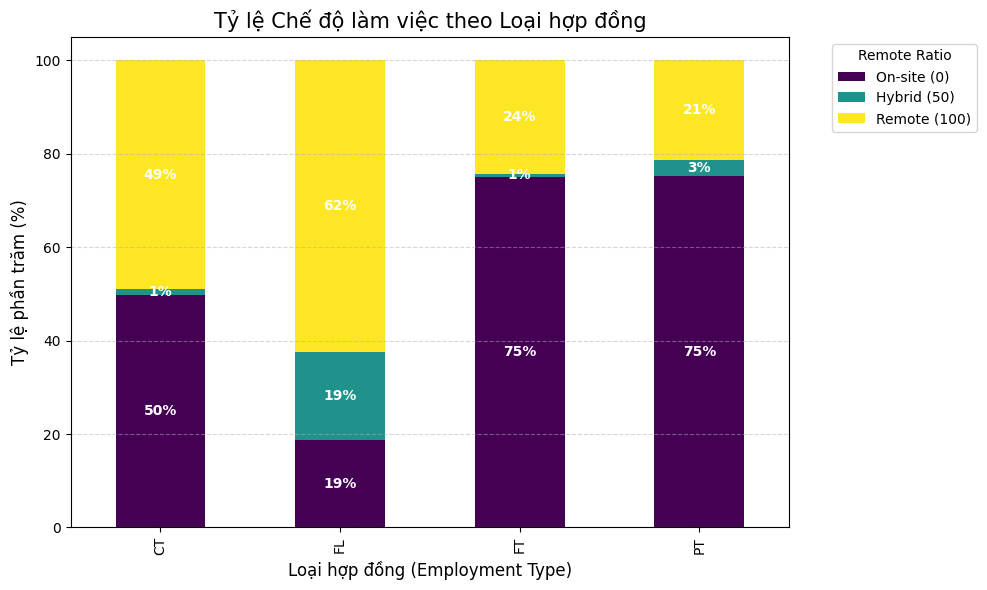

Số lượng mẫu chi tiết:
employment_type  remote_ratio
CT               0                 121
                 50                  3
                 100               119
FL               0                   3
                 50                  3
                 100                10
FT               0               38997
                 50                292
                 100             12639
PT               0                 186
                 50                  8
                 100                53
dtype: int64


In [50]:
# 1. Tạo bảng chéo (Crosstab) chuẩn hóa theo hàng (normalize='index')
# Để xem trong mỗi loại hợp đồng, tỷ lệ Remote/On-site là bao nhiêu
ct_emp_remote = pd.crosstab(df_corr['employment_type'], df_corr['remote_ratio'], normalize='index') * 100

print("Bảng tỷ lệ % chế độ làm việc theo loại hợp đồng:")
display(ct_emp_remote.round(2))

# 2. Trực quan hóa (Stacked Bar Chart)
ax = ct_emp_remote.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Tỷ lệ Chế độ làm việc theo Loại hợp đồng', fontsize=15)
plt.xlabel('Loại hợp đồng (Employment Type)', fontsize=12)
plt.ylabel('Tỷ lệ phần trăm (%)', fontsize=12)
plt.legend(title='Remote Ratio', labels=['On-site (0)', 'Hybrid (50)', 'Remote (100)'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị số liệu % lên biểu đồ để dễ đọc
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Kiểm tra số lượng mẫu của Freelance/Contract để nhận xét thận trọng
print("Số lượng mẫu chi tiết:")
print(df_corr.groupby(['employment_type', 'remote_ratio']).size())

**Nhận xét:**

1.  **Freelance (FL):**
    * Đúng như dự đoán, nhóm Freelancer có tỷ lệ làm việc từ xa (**Remote**) cao nhất, lên tới **62%**.
    * Đây cũng là nhóm có tỷ lệ **Hybrid (50%)** cao nhất (~19%), cho thấy tính linh hoạt cao của lao động tự do.
2.  **Contract (CT):**
    * Tỷ lệ phân chia khá cân bằng: **50% On-site** và **49% Remote**.
    * Điều này cho thấy nhân sự hợp đồng (thường là tư vấn viên hoặc dự án ngắn hạn) có thể được yêu cầu đến văn phòng làm việc trực tiếp ngang ngửa với việc làm từ xa.
3.  **Full-time (FT):**
    * Chiếm đa số dữ liệu và là nhóm có tỷ lệ **On-site** cao nhất (**75%**). Chỉ có khoảng 24% nhân viên chính thức được làm Remote hoàn toàn.
    * -> *Insight:* Các công ty vẫn ưu tiên quản lý nhân viên chính thức trực tiếp tại văn phòng hơn là các nhân sự bên ngoài (Freelance/Contract).

### Ma trận tương quan

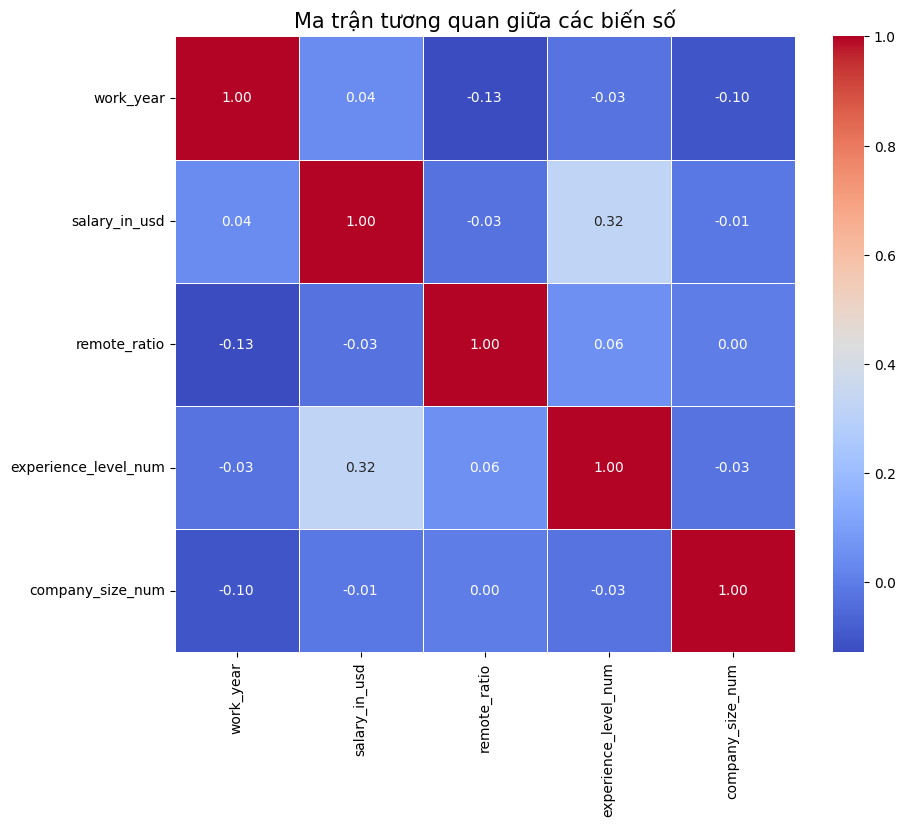

In [47]:
# 1. Tạo bản sao để mã hóa dữ liệu
df_heatmap = df_corr.copy()

# 2. Mã hóa các biến thứ bậc (Ordinal Encoding)
# Experience Level: Càng cao càng lớn
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df_heatmap['experience_level_num'] = df_heatmap['experience_level'].map(exp_map)

# Company Size: Càng to càng lớn
size_map = {'S': 0, 'M': 1, 'L': 2}
df_heatmap['company_size_num'] = df_heatmap['company_size'].map(size_map)

# 3. Chọn các cột số để tính tương quan
cols_for_corr = ['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_num', 'company_size_num']
corr_matrix = df_heatmap[cols_for_corr].corr()

# 4. Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số', fontsize=15)
plt.show()

# 2.4 Tổng kết & Định hướng

## 2.4.1 Tóm tắt Insights (Key Findings)

Sau quá trình phân tích dữ liệu, nhóm rút ra các kết luận chính:

* **Thị trường:** Dữ liệu bị chi phối mạnh mẽ bởi thị trường **Mỹ (US)** (~84%) và hình thức làm việc **Full-time** (~99%).
* **Lương & Kinh nghiệm:** Có mối quan hệ thuận chiều rõ rệt. Nhóm **Senior (SE)** chiếm đa số và có mức lương ổn định, trong khi nhóm **Executive (EX)** có mức lương (trung vị) vượt trội.
* **Nghề nghiệp:** **Data Scientist, Data Engineer, Data Analyst** là 3 trụ cột chính (chiếm số lượng đông trong khảo sát). Tuy nhiên, các vị trí liên quan đến **AI/Machine Learning** và **Quản lý (Manager)** mới là vị trí đang dẫn đầu về đãi ngộ.
* **Xu hướng lương:** Mức lương trung bình ngành có xu hướng tăng trưởng mạnh qua các năm (2020-2024), nhưng đang có dấu hiệu đi ngang (bão hòa) vào giai đoạn 2024-2025.
* **Làm việc từ xa (Remote Work):** Có một sự bất ngờ thú vị khi mức lương trung vị của nhóm **Remote (100%)** và **On-site (0%)** là **tương đương nhau** (~$140k). Điều này bác bỏ quan điểm cho rằng "làm việc từ xa sẽ bị giảm lương". Tuy nhiên, **Hybrid (50%)** lại có mức lương thấp nhất trong tập dữ liệu này.
* **Tính linh hoạt theo hợp đồng:** Nhân sự **Freelance (FL)** có tỷ lệ làm việc từ xa cao nhất (~62%), trong khi nhân viên **Full-time (FT)** vẫn bị gắn chặt với văn phòng nhiều hơn (75% là On-site).

## 2.4.1 Các giả thuyết đã được kiểm định
* ✅ **Giả thuyết 1:** "Làm sếp lương cao hơn làm lính" -> **Đúng.** (Experience Level EX lương cao nhất).
* ✅ **Giả thuyết 2:** "Làm việc tại Mỹ lương cao hơn các nước khác" -> **Đúng.** (Median lương US cao gấp ~1.5 lần các nước phát triển khác).
* ❌ **Giả thuyết 3:** "Công ty càng to lương càng cao" -> **Chưa chắc chắn.** (Dữ liệu cho thấy công ty Medium chiếm đa số và mức lương không chênh lệch quá nhiều so với Large).

## 2.4.3 Vấn đề của dữ liệu & Giải pháp cho bài toán Mô hình hóa
**Vấn đề phát hiện:**
* **Mất cân bằng dữ liệu (Imbalanced Data):**
    * `company_location`: Quá nhiều US, các quốc gia khác quá ít mẫu.
    * `employment_type`: Quá nhiều Full-time.
* **Nguy cơ (Risk):** Nếu đưa toàn bộ dữ liệu vào mô hình Machine Learning, mô hình sẽ bị **Bias** (thiên kiến) nặng nề theo thị trường Mỹ. Dự đoán cho các vị trí Part-time hoặc ở Châu Á/Châu Âu sẽ có độ sai số cực lớn (do mô hình coi chúng là nhiễu).

**Giải pháp đề xuất:**
1.  **Thu hẹp phạm vi bài toán (Scoping):** Chỉ xây dựng mô hình dự đoán lương cho thị trường **Mỹ (US)** và làm việc **Full-time**.
    * *Lý do:* Đây là tập dữ liệu chất lượng nhất, đủ lớn để mô hình học chính xác quy luật.
    * *Lợi ích:* Tăng độ chính xác (R2 score) của mô hình.
2.  **Gom nhóm (Binning):** Với biến `job_title`, thay vì để 347 loại, sẽ gom về 5-6 nhóm chính (Scientist, Engineer, Analyst, Manager, AI/ML) như đã làm ở phần 2.3 để giảm chiều dữ liệu.

## 2.4.4 4 Câu hỏi nghiên cứu (Research Questions)

Dựa trên dữ liệu và bối cảnh thực tế, nhóm đề xuất 4 câu hỏi đào sâu (Deep-dive questions) để phân tích tiếp theo:

### Câu hỏi 1: "Lương ngành Data tăng là do giá trị thật hay do lạm phát?"
* **Mô tả:** Biểu đồ 2.3.1 cho thấy lương tăng theo năm. Nhưng lạm phát tại Mỹ giai đoạn 2021-2023 cũng rất cao. Liệu mức tăng lương của Data Scientist có thắng được lạm phát không?
* **Phương pháp:**
    * Lấy dữ liệu CPI (Consumer Price Index) hoặc tỷ lệ lạm phát của Mỹ (từ nguồn ngoài: US Bureau of Labor Statistics) theo từng năm.
    * Tính "Lương thực tế" (Real Salary) = Lương danh nghĩa / CPI.
    * So sánh tốc độ tăng trưởng lương vs tốc độ lạm phát.

### Câu hỏi 2: "Cơn sốt AI (ChatGPT bùng nổ cuối 2022) tác động thế nào đến cấu trúc lương?"
* **Mô tả:** Từ cuối 2022, GenAI bùng nổ. Có phải chỉ riêng các kỹ sư AI/ML được tăng lương đột biến, còn Data Analyst truyền thống thì chững lại?
* **Phương pháp:**
    * Tách dữ liệu làm 2 nhóm: "AI/ML Engineers" và "Traditional Data Roles (DA/DS)".
    * Vẽ biểu đồ xu hướng lương (Line chart) của 2 nhóm này từ 2022 đến 2025.
    * Kiểm định xem độ dốc (slope) tăng trưởng của nhóm AI có cao hơn nhóm còn lại không.

### Câu hỏi 3: "Remote work: Cơ hội hay cái bẫy thu nhập?"
* **Mô tả:** Có quan điểm cho rằng làm Remote thì lương thấp hơn On-site (do công ty cắt giảm chi phí văn phòng và trả lương theo vùng miền giá rẻ). Dữ liệu này có chứng minh điều đó không?
* **Phương pháp:**
    * Kết hợp `remote_ratio` và `company_location` (chỉ xét tại US để loại bỏ yếu tố chênh lệch tỷ giá quốc gia).
    * So sánh lương trung bình của 3 nhóm: Remote (100), Hybrid (50), On-site (0).
    * Phân tích sâu hơn: Liệu các vị trí Senior/Exec mới được ưu tiên làm Remote lương cao?

### Câu hỏi 4: "So sánh sức mua (PPP): Lương $15k ở Châu Á có 'nghèo' hơn $100k ở Mỹ?"
* **Mô tả:** Nhìn số tuyệt đối thì lương ở VN/India/Indonesia rất thấp. Nhưng nếu so với GDP đầu người hoặc chi phí sống tại đó thì sao? Ngành này có giúp nhân sự lọt vào nhóm "thượng lưu" tại quốc gia của họ không?
* **Phương pháp:**
    * Lấy dữ liệu GDP per capita (PPP) của các quốc gia tương ứng (nguồn World Bank).
    * Tạo chỉ số mới: `Ratio` = `Salary` / `GDP_per_capita`.
    * So sánh `Ratio` này giữa Mỹ và các nước đang phát triển. (Ví dụ: Nếu Ratio Mỹ = 2.0, Ratio VN = 5.0 -> Data Scientist ở VN có vị thế xã hội cao hơn).